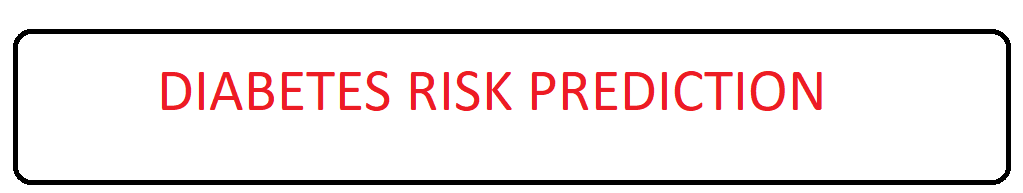

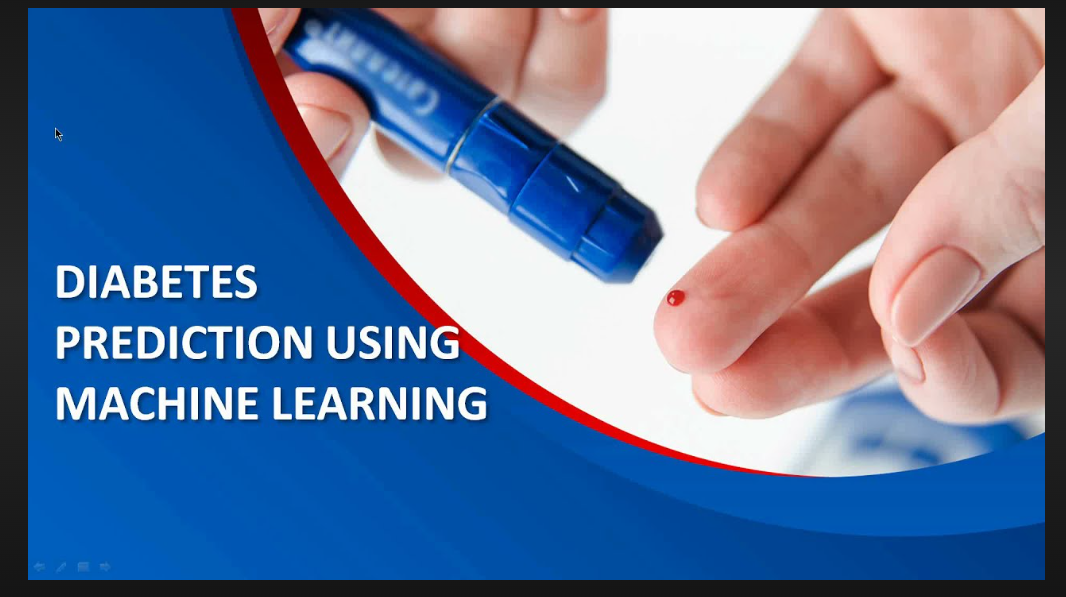

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# About Dataset

## 👉- Pregnancies: 
- Number of times pregnant

## 👉-Glucose: 
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- The 2-hour plasma glucose level <140 mg/dL is considered normal.
- The 2-hour plasma glucose level of 140-199 mg/dL indicates impaired glucose tolerance.
- The 2-hour plasma glucose level ≥200 mg/dL indicates diabetes.

## 👉- BloodPressure: Diastolic blood pressure (mm Hg)
- The normal range for diastolic blood pressure is usually considered to be between 60 mm Hg and 80 mm Hg for adults.
- However, blood pressure can vary depending on various factors such as age, health condition, and individual differences.

## 👉 - SkinThickness: Triceps skin fold thickness (mm)
Skin Thickness is a measurement of subcutaneous fat stored in the triceps area of the arm. It is commonly used as a
clinical measure of body fatness and is part of various health and fitness assessments. As of my last update in
September 2021, the American College of Sports Medicine (ACSM) provides reference ranges for skinfold
measurements in adults. For example, in males aged 18-29 years, a normal range for triceps skinfold thickness may
be around 7.0 to 15.5 millimeters. In females of the same age group, the normal range may be around 12.0 to 20.5
millimeters.

## 👉 - Insulin: 2-Hour serum insulin (𝜇U/ml)
In general, normal fasting insulin levels are usually in the range of 5 to 20 micro International Units per milliliter (𝜇𝑈/ml) for adults.

## 👉- BMI: Body mass index (weight in kg/(height in m)^2)
- The World Health Organization (WHO) and many health organizations define the following BMI categories for adults:

- Underweight: BMI less than 18.5
- Normal weight: BMI from 18.5 to 24.9
- Overweight: BMI from 25 to 29.9
- Obesity (Class 1): BMI from 30 to 34.9
- Obesity (Class 2): BMI from 35 to 39.9
- Extreme Obesity (Class 3): BMI 40 or higher

## 👉- DiabetesPedigreeFunction: 
- indicates the function which scores likelihood of diabetes based on family history.

## 👉- Age: 
Age (years)

## 👉- Outcome: Class variable (0 or 1) :
- The patient have diabetes or not

# ✏️✏️Purpose of the Project ✏️✏️

### Exploratory data analysis (EDA) is one of the most significant methods to examine the data we have. In this project, we are going to explore the hidden patterns in the dataset and extract information from them.

## Models implemented:
### In the dataset, the target variable has 2 possible outcomes/classes. It is a classification problem.
### - 🎯 Binary class Logistic Regression
### - 🎯 Decision Tree Classifier
### - 🎯 Bagging Classifier
### - 🎯 Random Forest Classifier
### - 🎯 KNearestNeighbour Classifier
### - 🎯 Support Vector Machine

### POINTS TO REMEMBER TO PREDICT A GOOD CLASSIFICATION MODEL

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import  train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Loading and Reading Dataset

In [2]:
dataset=pd.read_csv('diabetes.csv')

In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## To find the information about the data set

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Descriptive statistics(Univariate analysis)

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


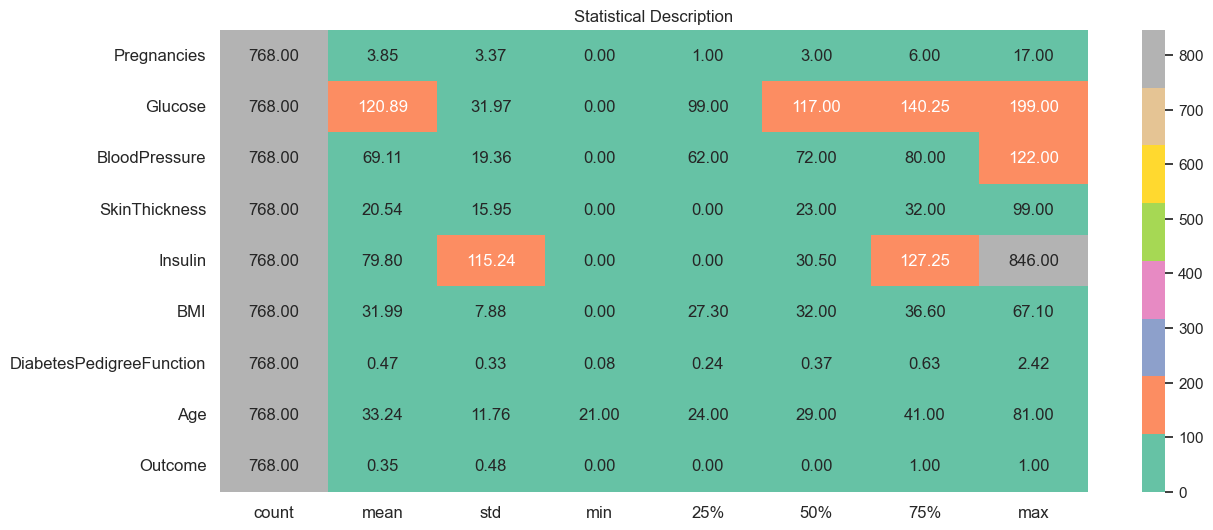

In [6]:
def descriptive_stats(df):
    desc = df.describe().round(2).T
    desc_df = pd.DataFrame(index=df.columns,columns=desc.columns,data=desc) 
    plt.figure(figsize=(14,6))
    sns.heatmap(desc, annot=True, cmap='Set2', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statistical Description')
    plt.show()
descriptive_stats(dataset)

# PREPROCESSING:

### 🎯  Checking null values`

In [7]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
dataset.isnull().sum()/len(dataset)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

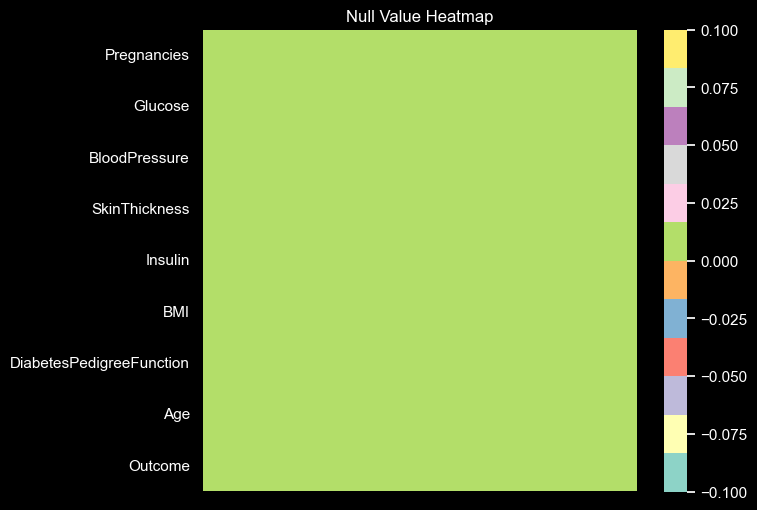

In [9]:
# Create a heatmap of null values
plt.style.use('dark_background')
plt.figure(figsize=(7, 6))
sns.heatmap(dataset.isnull().T, cmap='Set3', cbar=True, xticklabels= False)
plt.title('Null Value Heatmap')
# Display the plot
plt.show()

## 🎯Finding Unique Values:

In [10]:
for i in dataset.columns:
    print('********************************',i,'**********************************')
    print()
    print(set(dataset[i].tolist()))

******************************** Pregnancies **********************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}
******************************** Glucose **********************************

{0, 44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199}
******************************** BloodPressure **********************************

{0, 24, 30, 38, 40, 44, 46, 48, 50, 52, 54, 55, 56, 58, 60

### 📌In the dataset min =0 for Glucose , Blood Pressure , Skin Thickness , Insulin , BMI are impossible values. So they should be treated as null values.

## 🎯Checking Outliers:

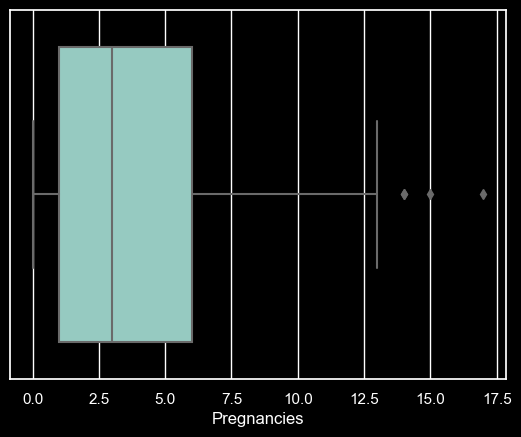

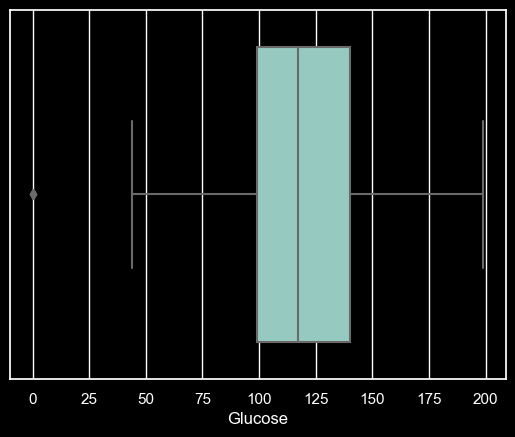

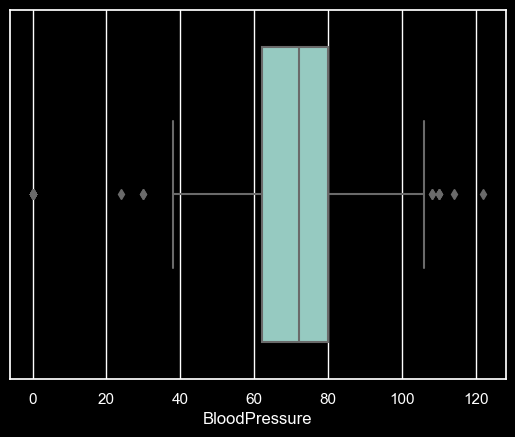

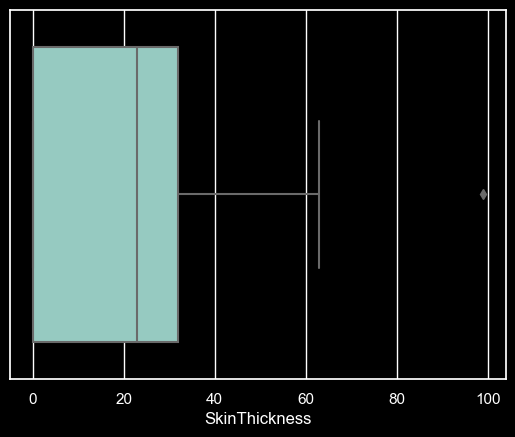

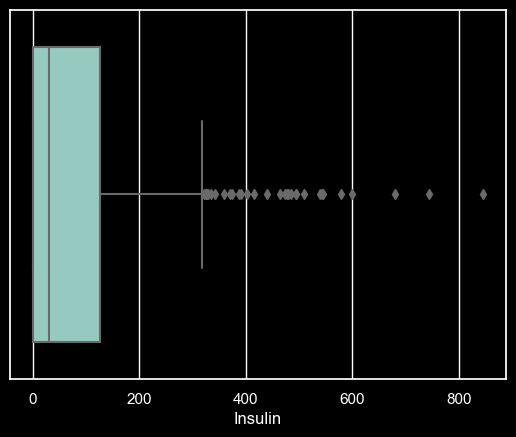

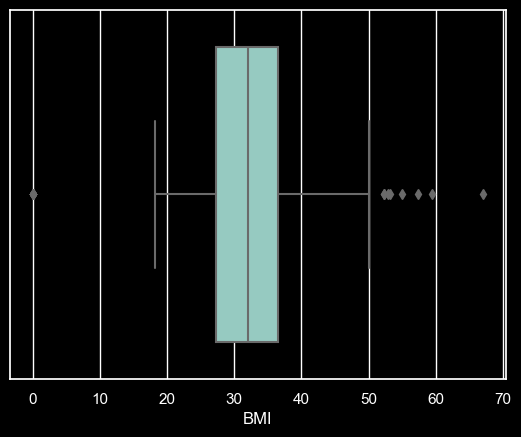

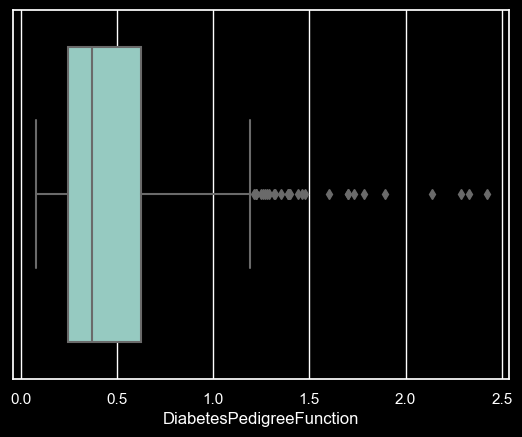

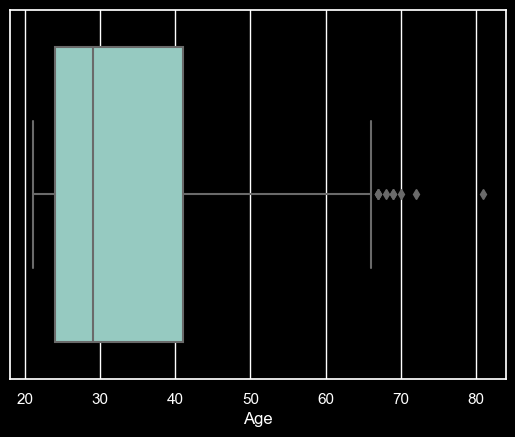

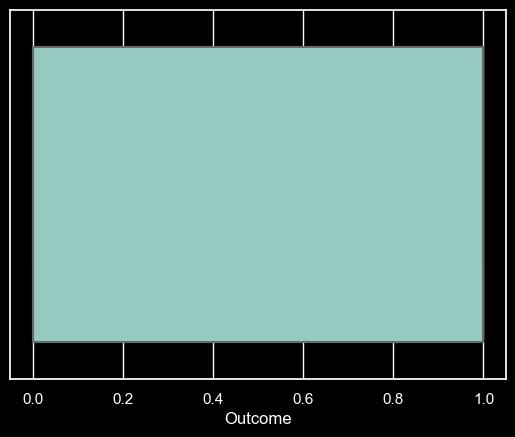

In [11]:
def boxplot(col):
    sns.boxplot(dataset[col])
    plt.show()
    

for i in list(dataset.select_dtypes(exclude=['object']).columns):
    boxplot(i)

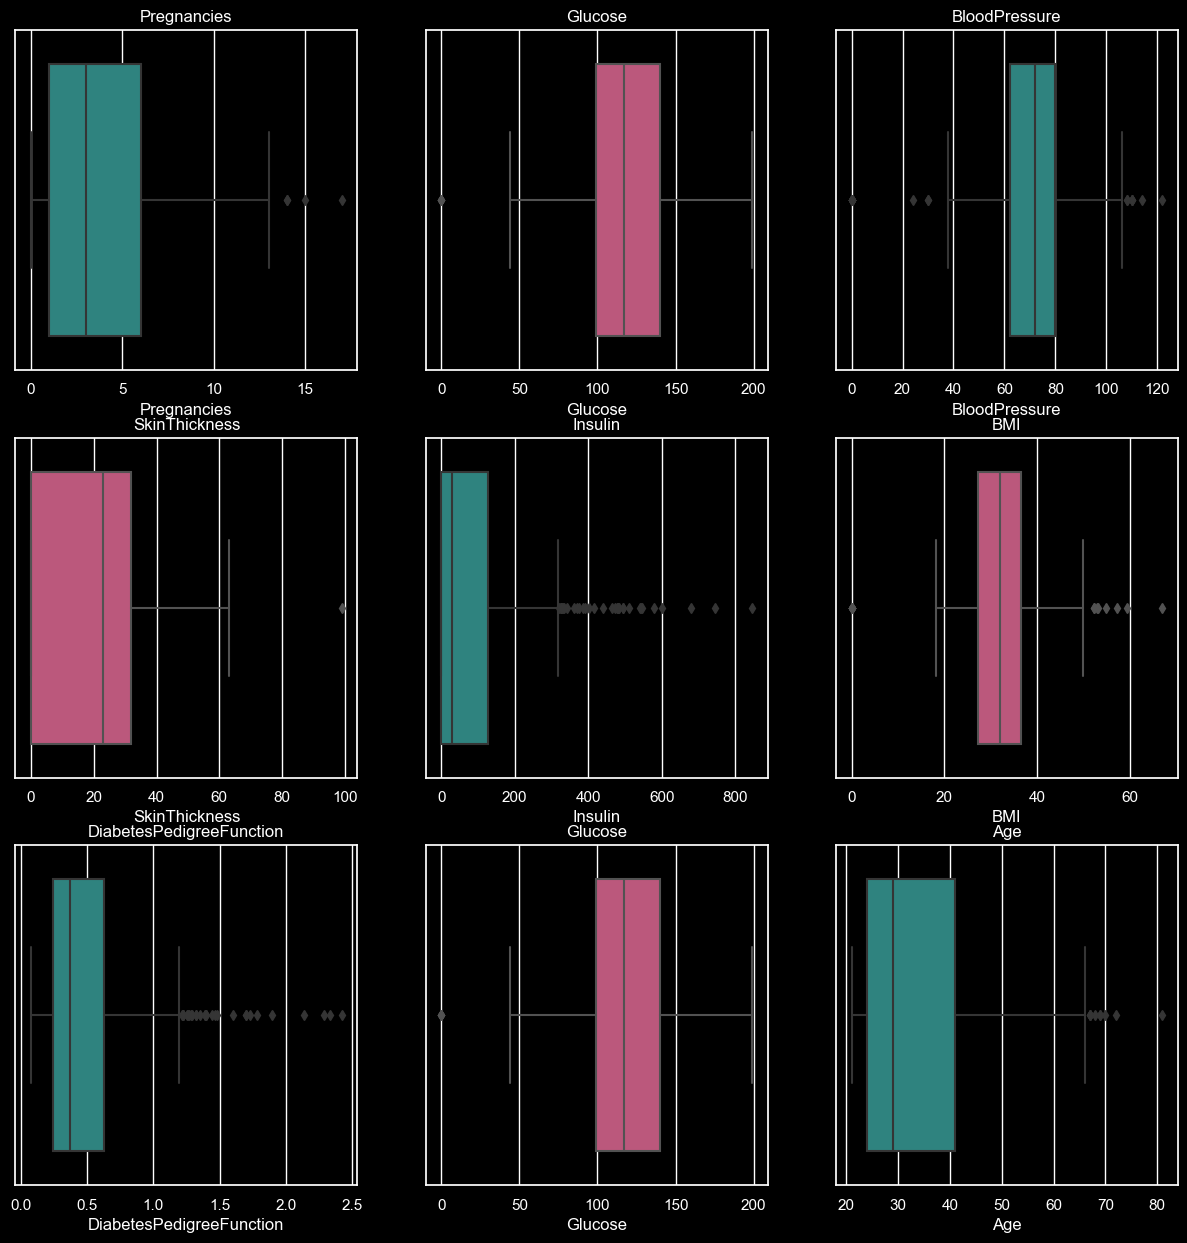

In [12]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.title('Pregnancies')
sns.boxplot(dataset["Pregnancies"],palette='viridis')


plt.subplot(3,3,2)
plt.title('Glucose')
sns.boxplot(dataset["Glucose"],palette='plasma')

plt.subplot(3,3,3)
plt.title('BloodPressure')
sns.boxplot(dataset["BloodPressure"],palette='viridis')

plt.subplot(3,3,4)
plt.title('SkinThickness')
sns.boxplot(dataset["SkinThickness"],palette='plasma')

plt.subplot(3,3,5)
plt.title('Insulin')
sns.boxplot(dataset["Insulin"],palette='viridis')

plt.subplot(3,3,6)
plt.title('BMI')
sns.boxplot(dataset["BMI"],palette='plasma')

plt.subplot(3,3,7)
plt.title('DiabetesPedigreeFunction')
sns.boxplot(dataset["DiabetesPedigreeFunction"],palette='viridis')

plt.subplot(3,3,8)
plt.title('Glucose')
sns.boxplot(dataset["Glucose"],palette='plasma')

plt.subplot(3,3,9)
plt.title('Age')
sns.boxplot(dataset["Age"],palette='viridis')



plt.show()

### 📌We will go with IMPUTATION to handle the zero's

In [13]:
dataset['Glucose']=np.where(dataset['Glucose']==0,dataset['Glucose'].mean(),dataset['Glucose'])
dataset['BloodPressure']=np.where(dataset['BloodPressure']==0,dataset['BloodPressure'].mean(),dataset['BloodPressure'])
dataset['SkinThickness']=np.where(dataset['SkinThickness']==0,dataset['Glucose'].mean(),dataset['SkinThickness'])
dataset['Insulin']=np.where(dataset['Insulin']==0,dataset['Glucose'].mean(),dataset['Insulin'])
dataset['BMI']=np.where(dataset['BMI']==0,dataset['Glucose'].mean(),dataset['BMI'])

In [14]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,56.502245,139.055886,33.735414,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,43.153027,86.692012,12.641403,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.261204,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,35.000000,121.681605,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,121.681605,127.250000,36.825000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,121.681605,846.000000,121.681605,2.420000,81.000000,1.000000


## 🎯Checking Imbalance data

In [15]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### 📌data is very close to imbalance so we'll do SMOTE and handle imbalancing

### 👉-Splitting dependent and independent variables

In [16]:
x=dataset.drop('Outcome',axis=1)

In [17]:
y=dataset['Outcome']

In [18]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,121.681605,33.6,0.627,50
1,1,85.0,66.0,29.000000,121.681605,26.6,0.351,31
2,8,183.0,64.0,121.681605,121.681605,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,121.681605,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,121.681605,121.681605,30.1,0.349,47


In [19]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## 🎯 Feature Scaling:

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)

In [21]:
x_sc

array([[ 0.63994726,  0.86527574, -0.0210444 , ..., -0.01071889,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.56481576,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -0.82603285,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.59647844,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.28776733,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.26402032,
        -0.47378505, -0.87137393]])

## 🎯Balancing data:

In [22]:
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x,y)
print('BEFORE SAMPLING:',y.value_counts())
print("=============================================================================================================")
print('AFTER SAMPLING:',y_smote.value_counts())



BEFORE SAMPLING: 0    500
1    268
Name: Outcome, dtype: int64
AFTER SAMPLING: 1    500
0    500
Name: Outcome, dtype: int64


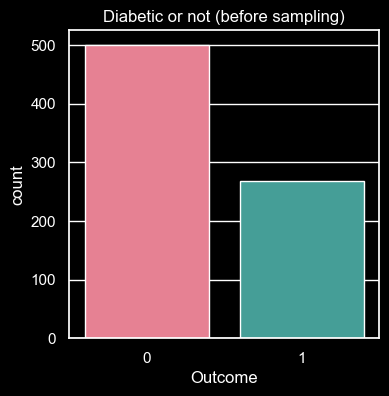

In [23]:
plt.style.use('dark_background')
plt.figure(figsize = (4,4))
ax = sns.countplot(x= dataset.Outcome , data= dataset, palette ='husl')
ax.set_title('Diabetic or not (before sampling)')
plt.show()

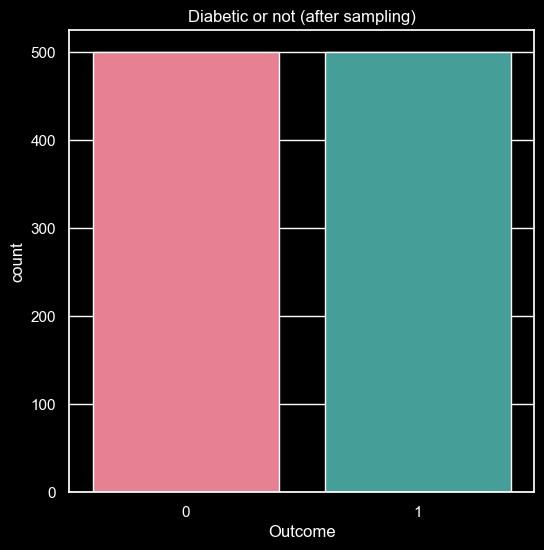

In [24]:
plt.style.use('dark_background')
plt.figure(figsize = (6,6))
ax = sns.countplot(x= y_smote , data= y_smote, palette ='husl')
ax.set_title('Diabetic or not (after sampling)')
plt.show()

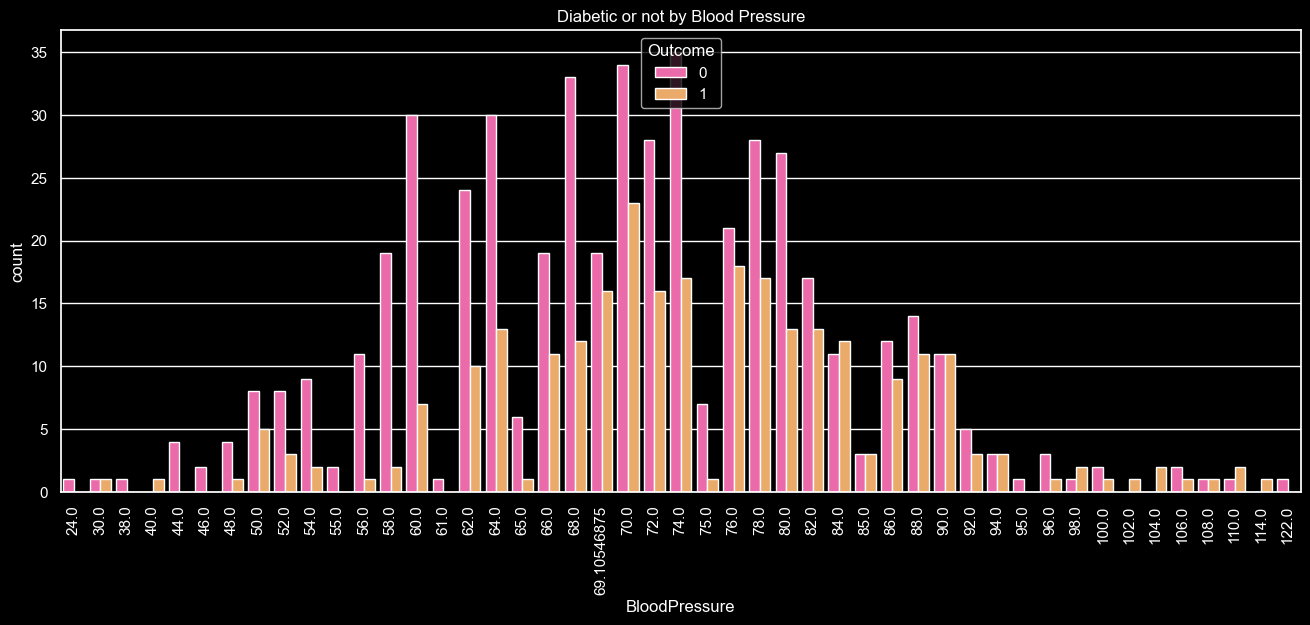

In [25]:
plt.style.use('dark_background')
plt.figure(figsize=(16,6))
plt.xticks(rotation = 90)
ax = sns.countplot(x= dataset['BloodPressure'] , hue= dataset['Outcome'], palette ='spring')
ax.set_title('Diabetic or not by Blood Pressure')
plt.show()

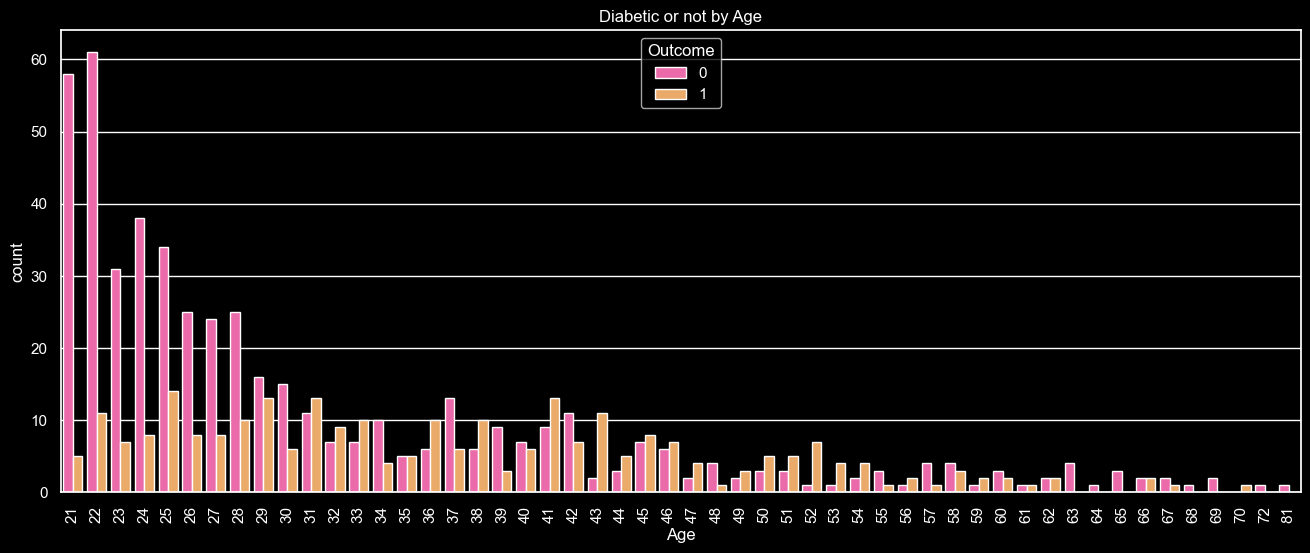

In [26]:
plt.style.use('dark_background')
plt.figure(figsize=(16,6))
plt.xticks(rotation = 90)
ax = sns.countplot(x= dataset['Age'] , hue= dataset['Outcome'], palette ='spring')
ax.set_title('Diabetic or not by Age')
plt.show()

## 🎯DISTRIBUTIONS:

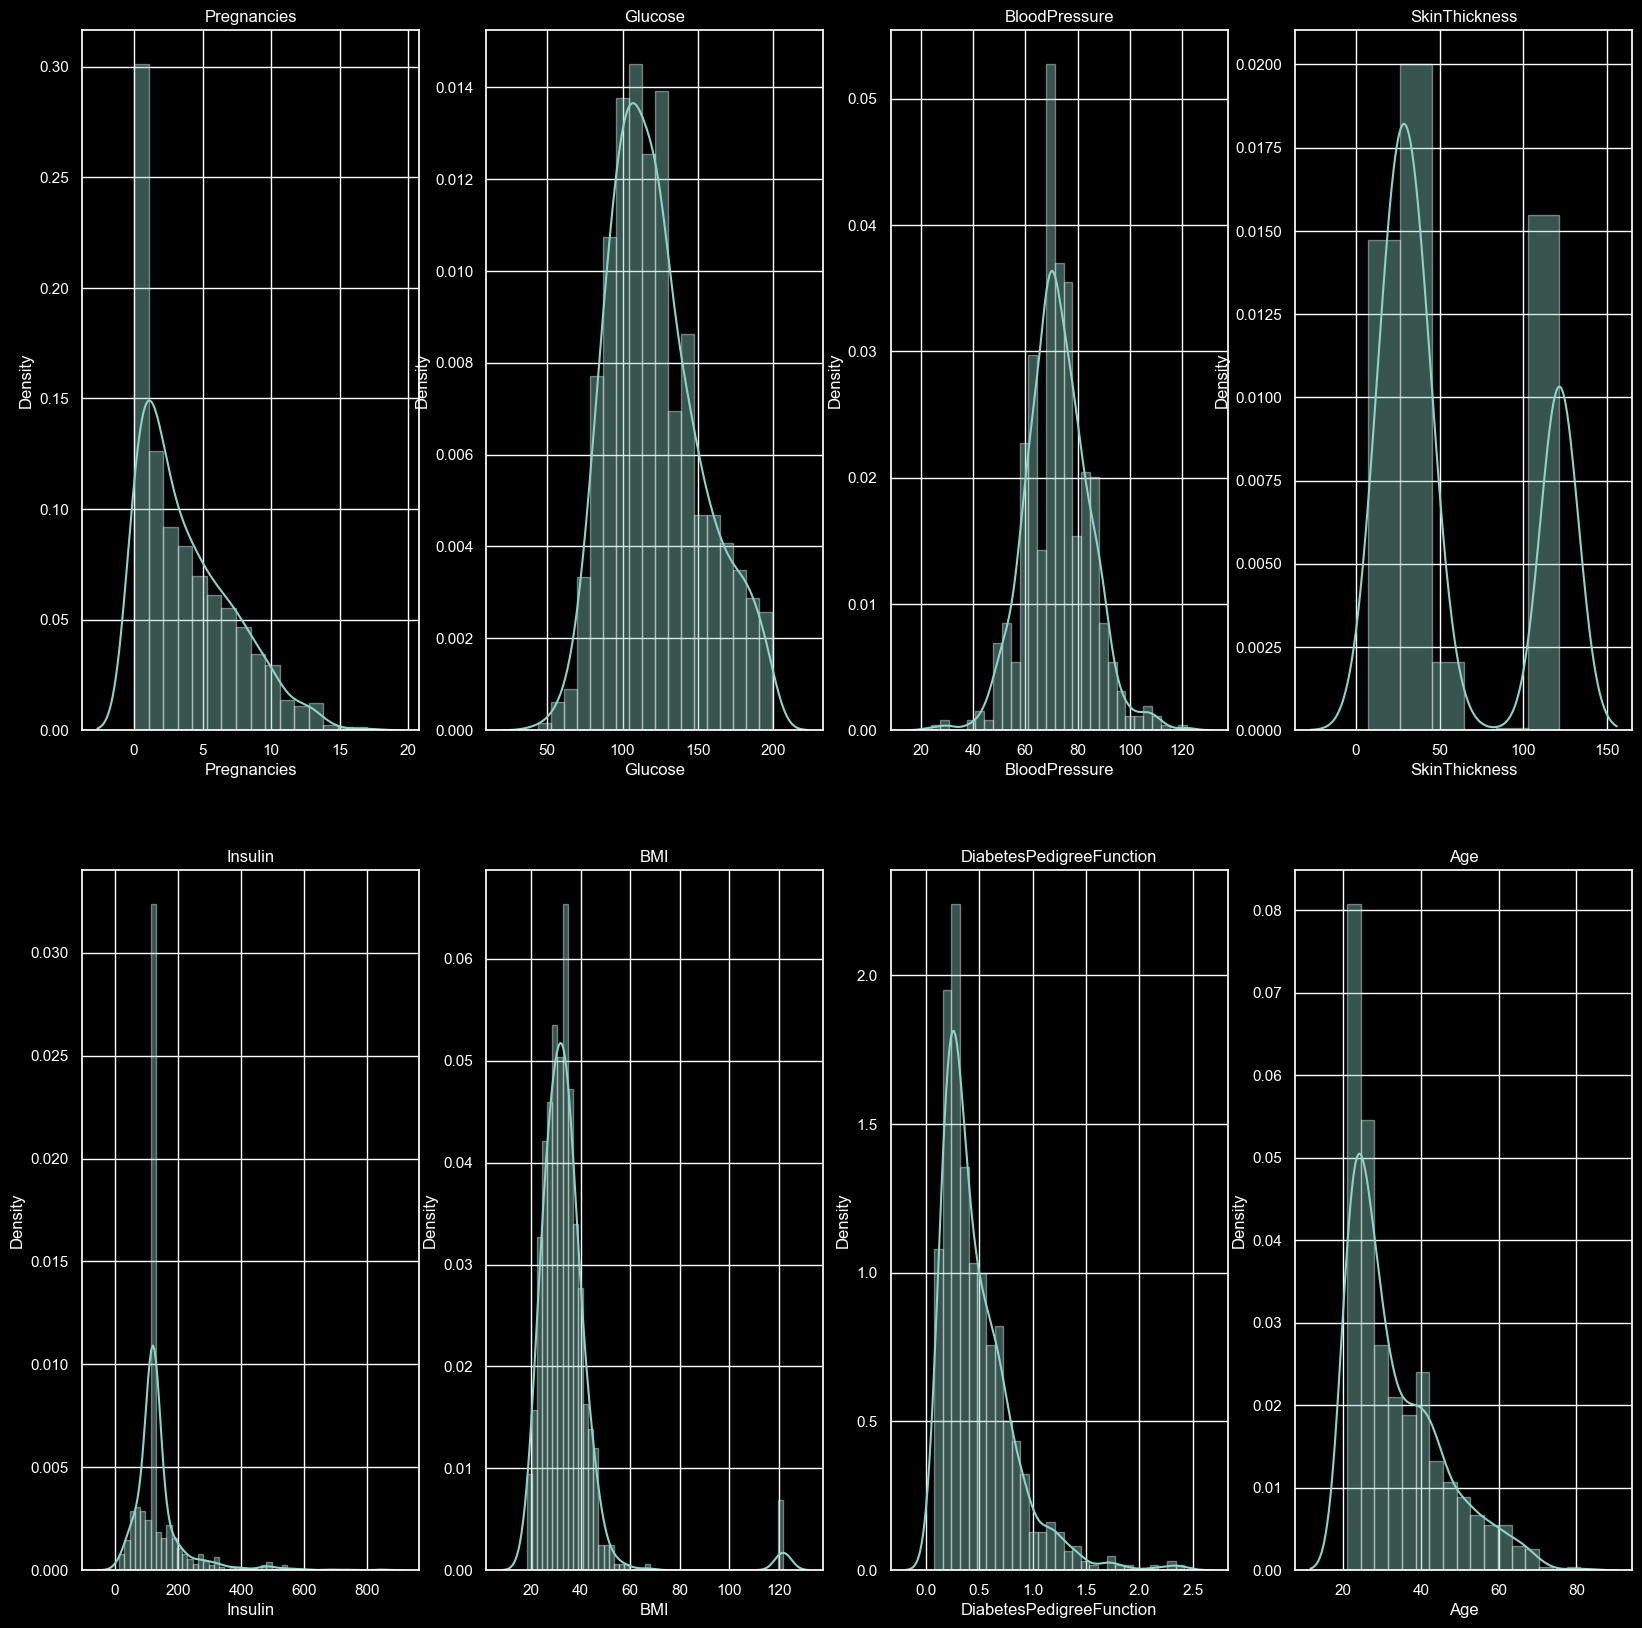

In [27]:
plt.figure(figsize=(20,20))
plt.subplot(2,4,1)
plt.title('Pregnancies')
sns.distplot(dataset["Pregnancies"])


plt.subplot(2,4,2)
plt.title('Glucose')
sns.distplot(dataset["Glucose"])

plt.subplot(2,4,3)
plt.title('BloodPressure')
sns.distplot(dataset["BloodPressure"])

plt.subplot(2,4,4)
plt.title('SkinThickness')
sns.distplot(dataset["SkinThickness"])

plt.subplot(2,4,5)
plt.title('Insulin')
sns.distplot(dataset["Insulin"])

plt.subplot(2,4,6)
plt.title('BMI')
sns.distplot(dataset["BMI"])

plt.subplot(2,4,7)
plt.title('DiabetesPedigreeFunction')
sns.distplot(dataset["DiabetesPedigreeFunction"])


plt.subplot(2,4,8)
plt.title('Age')
sns.distplot(dataset["Age"])



plt.show()

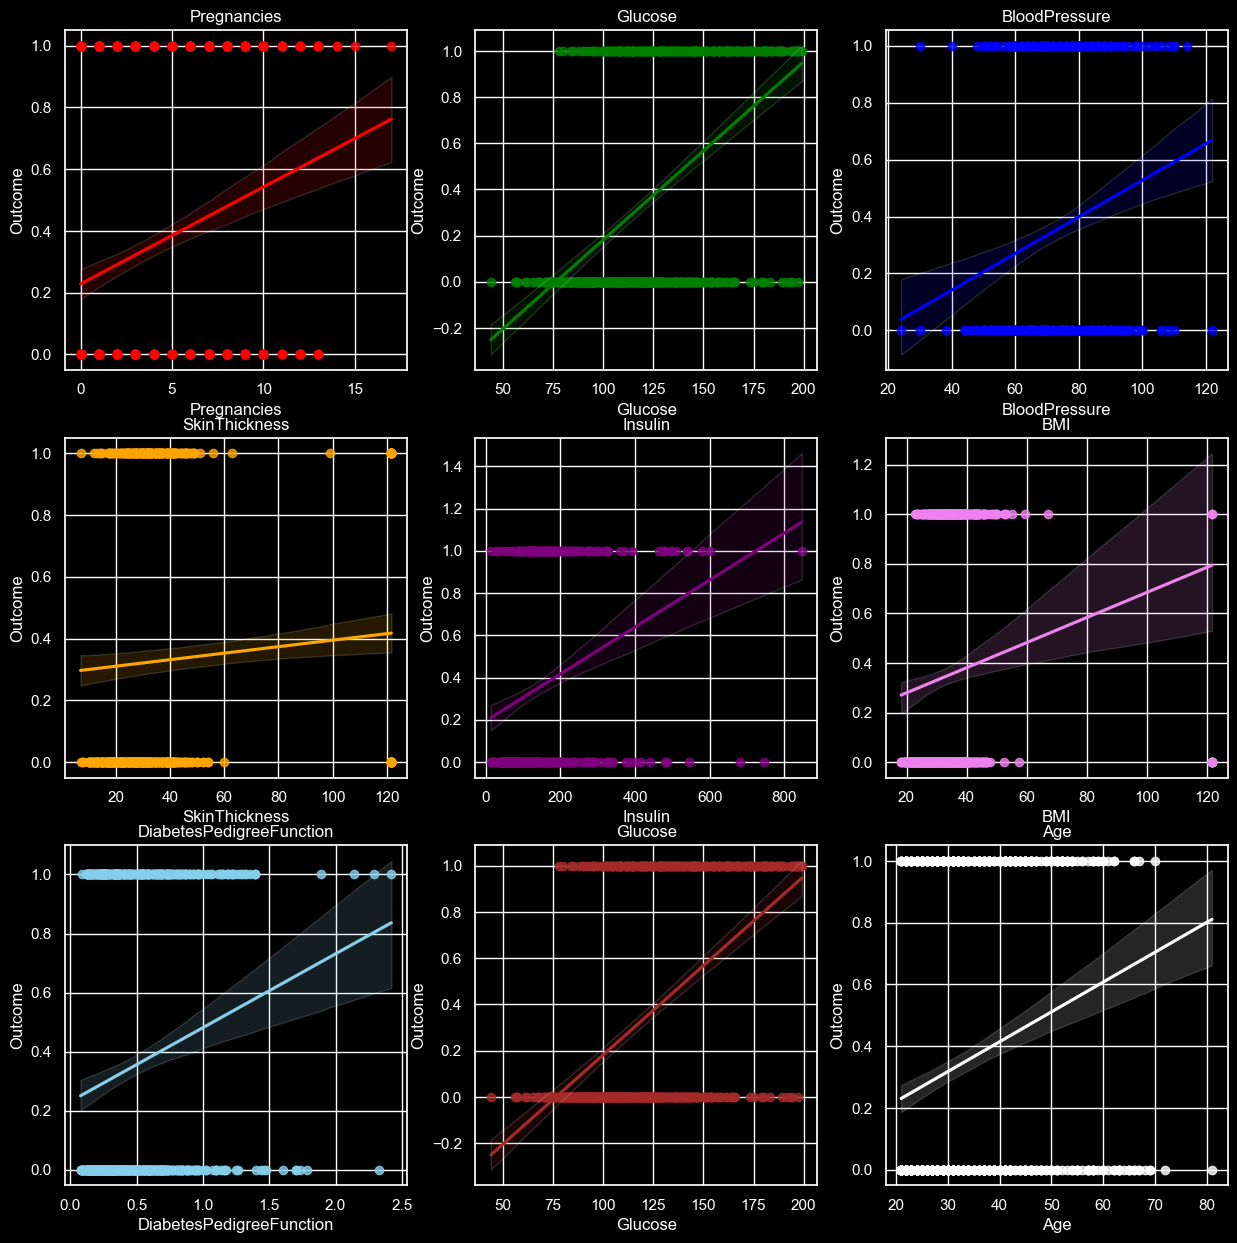

In [28]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.title('Pregnancies')
sns.regplot(x="Pregnancies",y="Outcome",data=dataset,color='red')


plt.subplot(3,3,2)
plt.title('Glucose')
sns.regplot(x="Glucose",y="Outcome",data=dataset,color='green')

plt.subplot(3,3,3)
plt.title('BloodPressure')
sns.regplot(x="BloodPressure",y="Outcome",data=dataset,color='blue')

plt.subplot(3,3,4)
plt.title('SkinThickness')
sns.regplot(x="SkinThickness",y="Outcome",data=dataset,color='orange')

plt.subplot(3,3,5)
plt.title('Insulin')
sns.regplot(x="Insulin",y="Outcome",data=dataset,color='purple')

plt.subplot(3,3,6)
plt.title('BMI')
sns.regplot(x="BMI",y="Outcome",data=dataset,color='violet')

plt.subplot(3,3,7)
plt.title('DiabetesPedigreeFunction')
sns.regplot(x="DiabetesPedigreeFunction",y="Outcome",data=dataset,color='skyblue')

plt.subplot(3,3,8)
plt.title('Glucose')
sns.regplot(x="Glucose",y="Outcome",data=dataset,color='brown')

plt.subplot(3,3,9)
plt.title('Age')
sns.regplot(x="Age",y="Outcome",data=dataset,color='white')



plt.show()

## 🎯Finding correlation:

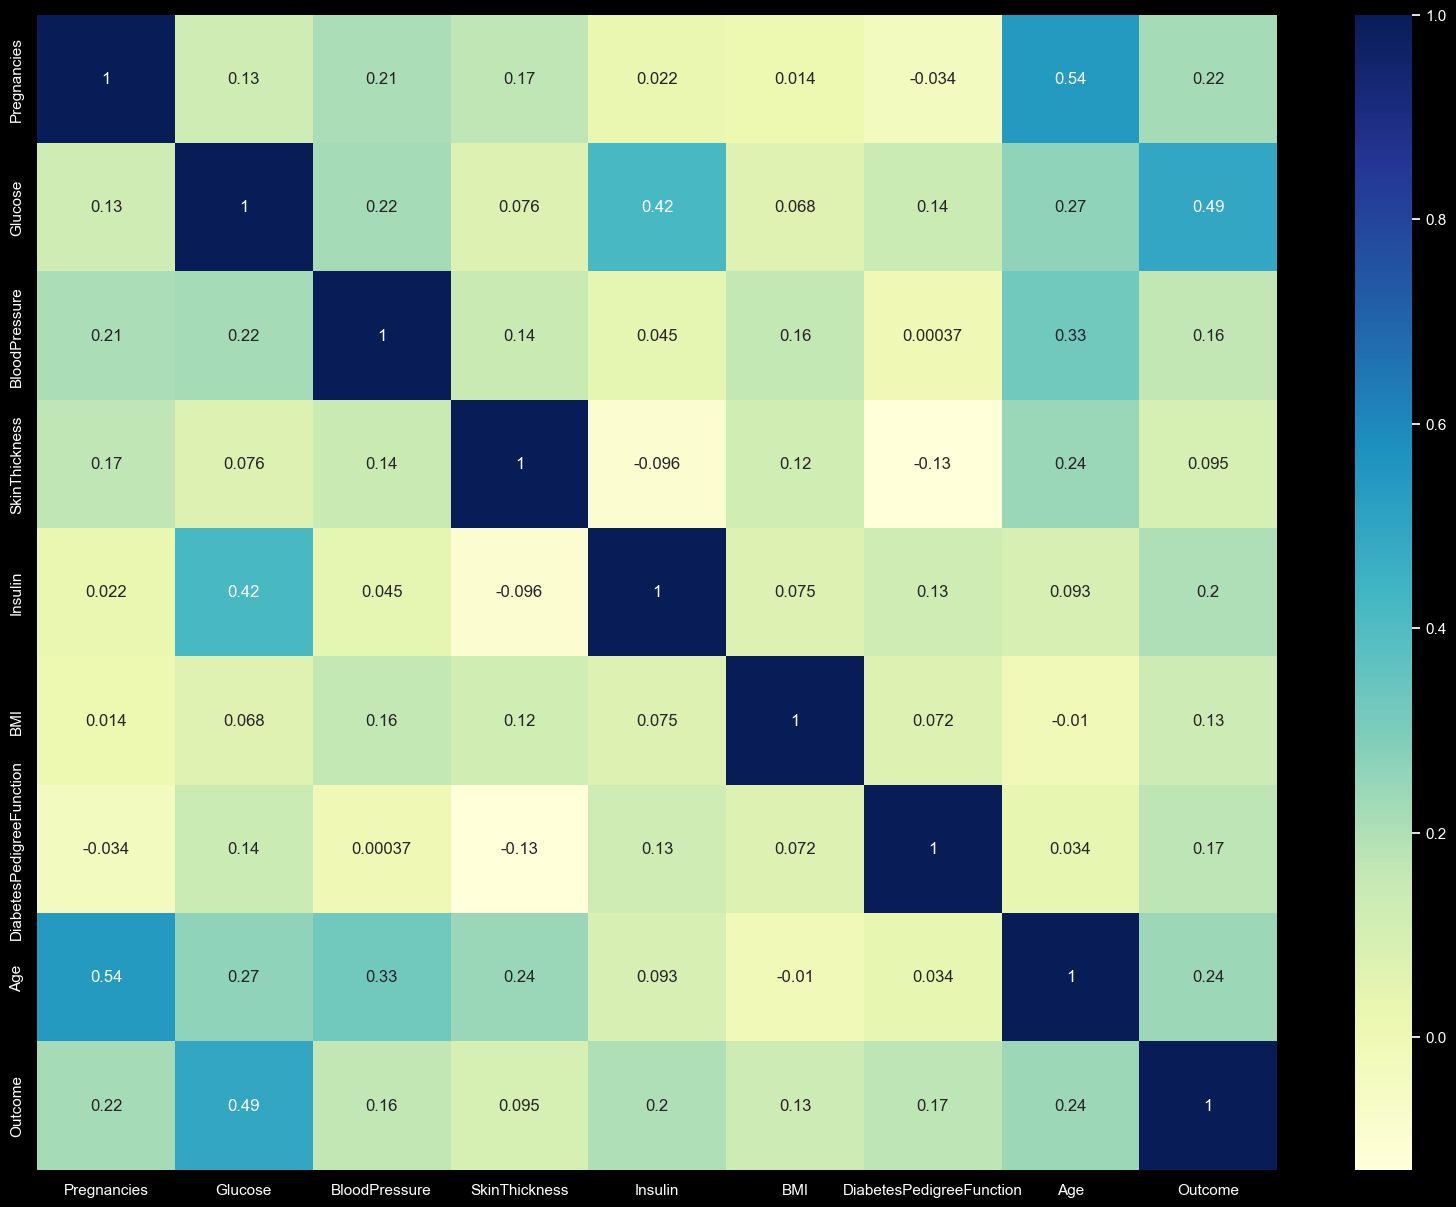

In [29]:
plt.style.use('dark_background')
plt.figure(figsize=(20,15))
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

## 🎯Split data into  train and test data(with scaled and imbalanced data)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.25,random_state=1,stratify=y)

# 🎯 Binary class Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

## 👉- EVALUATION

Trainging Accuracy Score : 0.7306666666666667
Test Accuracy Score : 0.716

                Classification_report_Train
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       375
           1       0.75      0.70      0.72       375

    accuracy                           0.73       750
   macro avg       0.73      0.73      0.73       750
weighted avg       0.73      0.73      0.73       750

                Classification_report_Test
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       125
           1       0.75      0.66      0.70       125

    accuracy                           0.72       250
   macro avg       0.72      0.72      0.71       250
weighted avg       0.72      0.72      0.71       250

confusion_matrix_Test : 
 
 [[97 28]
 [43 82]]
confusion_matrix_Train : 
 
 [[285  90]
 [112 263]]


Text(0.5, 1.0, 'confusion_matrix_Test')

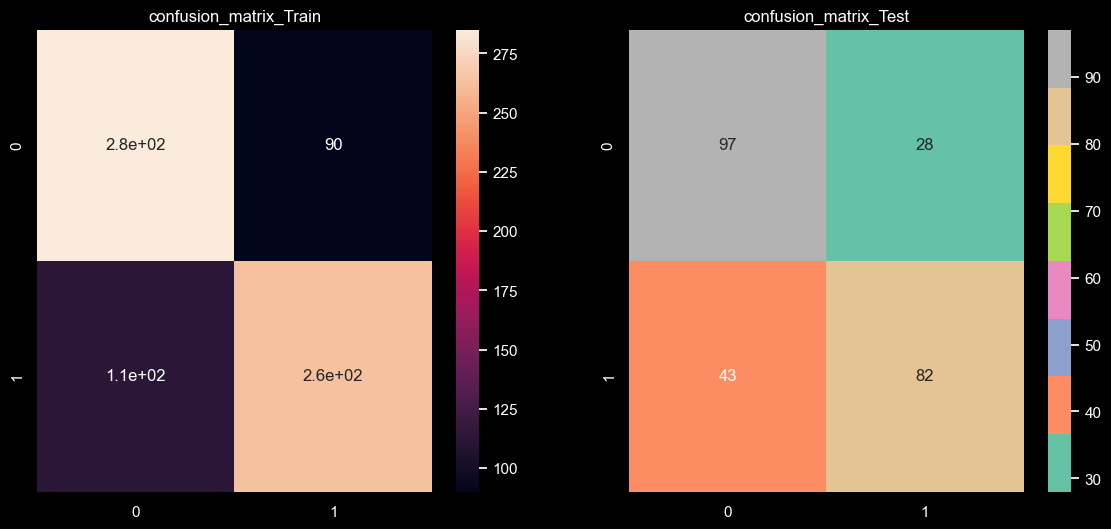

In [95]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)
y_pred_logit_train=logit.predict(x_train)
y_pred_logit_test=logit.predict(x_test)
Train_acc = accuracy_score(y_train, y_pred_logit_train)
Test_acc = accuracy_score(y_test, y_pred_logit_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc,)
print("Test Accuracy Score :", Test_acc)
print()
print('=='*35)
print( ' '*15,'Classification_report_Train',)
print('=='*35)
print( classification_report(y_train, y_pred_logit_train))
print('=='*35)
print( ' '*15,'Classification_report_Test',)
print('=='*35)
print(classification_report(y_test, y_pred_logit_test))
print('=='*35)
cm_train= confusion_matrix(y_train, y_pred_logit_train)
cm_test = confusion_matrix(y_test, y_pred_logit_test)
print('===='*10)
print( 'confusion_matrix_Test :','\n','\n',cm_test)
print('===='*10)
print( 'confusion_matrix_Train :','\n','\n',cm_train)
print('===='*10)
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot = True, )
plt.title('confusion_matrix_Train')
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot = True, cmap= 'Set2')
plt.title('confusion_matrix_Test')

## 👉-CONFUSION MATRIX

confusion_matrix_Test : 
 
 [[97 28]
 [43 82]]
confusion_matrix_Train : 
 
 [[285  90]
 [112 263]]


Text(0.5, 1.0, 'confusion_matrix_Test')

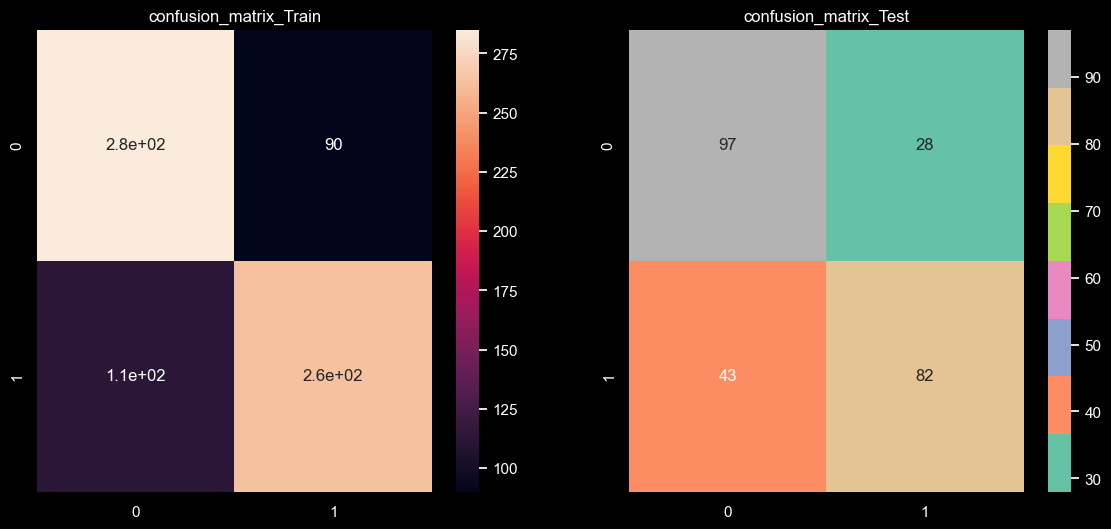

In [96]:
cm_train= confusion_matrix(y_train, y_pred_logit_train)
cm_test = confusion_matrix(y_test, y_pred_logit_test)
print('===='*10)
print( 'confusion_matrix_Test :','\n','\n',cm_test)
print('===='*10)
print( 'confusion_matrix_Train :','\n','\n',cm_train)
print('===='*10)
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot = True, )
plt.title('confusion_matrix_Train')
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot = True, cmap= 'Set2')
plt.title('confusion_matrix_Test')

In [34]:
from sklearn.model_selection import GridSearchCV

Trainging Accuracy Score : 0.7708333333333334
Test Accuracy Score : 0.7552083333333334

                Classification_report_Train
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       375
           1       0.71      0.58      0.64       201

    accuracy                           0.77       576
   macro avg       0.75      0.73      0.73       576
weighted avg       0.77      0.77      0.76       576

                Classification_report_Test
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       125
           1       0.72      0.49      0.58        67

    accuracy                           0.76       192
   macro avg       0.74      0.69      0.71       192
weighted avg       0.75      0.76      0.74       192

confusion_matrix_Test : 
 
 [[112  13]
 [ 34  33]]
confusion_matrix_Train : 
 
 [[328  47]
 [ 85 116]]


Text(0.5, 1.0, 'confusion_matrix_Test')

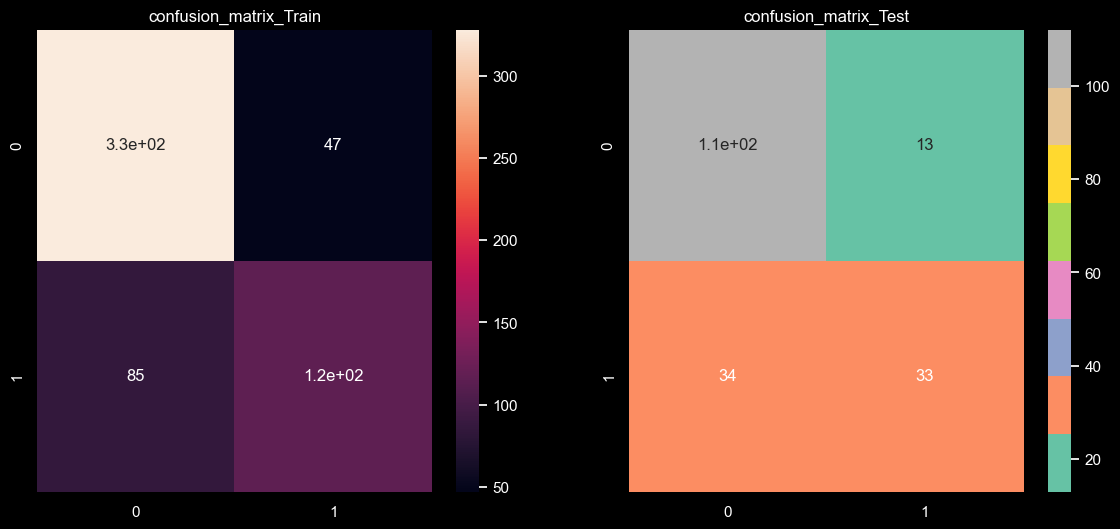

In [35]:
param_grid={'penalty':['l1', 'l2', 'elasticnet', None],
            'C':[0.5,1.0]}
grid=GridSearchCV(LogisticRegression(),param_grid,refit=True)
grid.fit(x_train,y_train)
log_grid_pred_train=grid.predict(x_train)
log_grid_pred_test=grid.predict(x_test)
Train_acc = accuracy_score(y_train, log_grid_pred_train)
Test_acc = accuracy_score(y_test, log_grid_pred_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc)
print("Test Accuracy Score :", Test_acc)
print()
print('=='*35)
print( ' '*15,'Classification_report_Train',)
print('=='*35)
print( classification_report(y_train, log_grid_pred_train))
print('=='*35)
print( ' '*15,'Classification_report_Test',)
print('=='*35)
print(classification_report(y_test, log_grid_pred_test))
print('=='*35)
cm_train= confusion_matrix(y_train, log_grid_pred_train)
cm_test = confusion_matrix(y_test, log_grid_pred_test)
print('===='*10)
print( 'confusion_matrix_Test :','\n','\n',cm_test)
print('===='*10)
print( 'confusion_matrix_Train :','\n','\n',cm_train)
print('===='*10)
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot = True, )
plt.title('confusion_matrix_Train')
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot = True, cmap= 'Set2')
plt.title('confusion_matrix_Test')

## 👉- Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
training_accuracy =cross_val_score(logit, x_train, y_train, cv =10)
test_accuracy =cross_val_score(logit, x_test, y_test, cv =10)
print("TRAINIG ACCURACY MEAN:",training_accuracy.mean())
print("TEST ACCURACY MEAN:",test_accuracy.mean())
print("TRAINING ACCURACY Max:",training_accuracy.max())
print("TEST ACCURACY MAX:",test_accuracy.max())

TRAINIG ACCURACY MEAN: 0.7567453115547489
TEST ACCURACY MEAN: 0.713421052631579
TRAINING ACCURACY Max: 0.8448275862068966
TEST ACCURACY MAX: 0.8421052631578947


### 🎯Receiver Operating Characteristic with Area Under Curve

In [37]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc=roc_auc_score(y_test,y_pred_logit_test)
logistic_roc_auc

0.6942686567164178

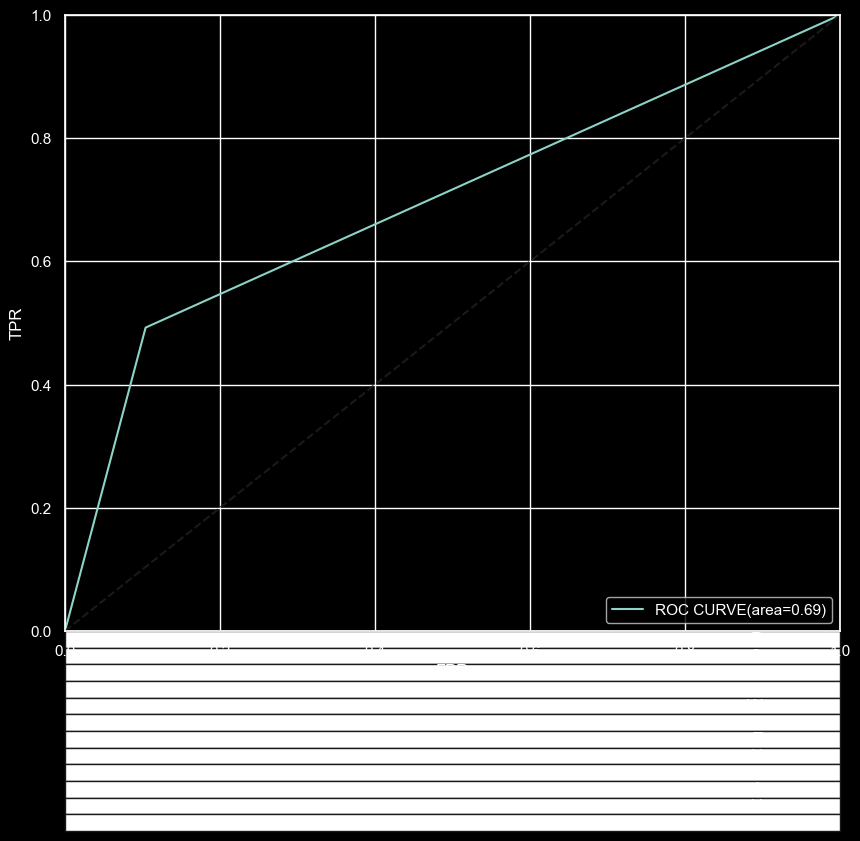

In [38]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_logit_test)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label='ROC CURVE(area=%0.2f)'%logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.table('ROC WITH AUC')
plt.legend(loc='lower right')
plt.show()

In [97]:
logit_acc=accuracy_score(y_test, y_pred_logit_test)
logit_acc_train=accuracy_score(y_train,y_pred_logit_train)

## Summary of my Logistic Model
### Based on the provided training and testing results, along with the AUC-ROC curve analysis, let's interpret the performance of the logistic regression model:
### Training and Testing Accuracy (after cross validation):
### Training Accuracy Score: Approximately 77%
### Test Accuracy Score: Approximately 75%

### Interpretation:
- The model achieves an accuracy of approximately 77% on the training data and 75% on the testing data. This indicates that the model performs reasonably well in predicting the correct class labels for both datasets. There is a scope for improvement.
### Overall Interpretation:
- The logistic regression model shows a reasonably good performance, with accuracy scores of around 77% on the training data and 75% on the testing data even after cross validation
- The classification report indicates that the model performs better in identifying negative cases (0) compared to positive cases (1) for both the training and testing datasets. There is imbalancy between Recall, precision and F1 score
- The AUC-ROC curve analysis suggests moderate discrimination power of the model in distinguishing between positive and negative cases.

## Model Improvement

### We can improve the model by using following techniques:
###  👉- BAGGING CLASSIFIER
### 👉- RANDOMFOREST CLASSIFIER
### 👉- DECISION TREE CLASSIFIER
### 👉- K NEAREST NEIGHBOUR
### 👉- SUPPORT VECTOR MACHINE

## 🎯Decisiontree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred_dtree_train=dtree.predict(x_train)
y_pred_dtree_test=dtree.predict(x_test)
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_dtree_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_dtree_test))
print("================================================================================================================")
print('classification_report_train:',classification_report(y_train,y_pred_dtree_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_dtree_test))
print("================================================================================================================")
print('accuracy_score_train:',accuracy_score(y_train,y_pred_dtree_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_dtree_test))

Confusion_matrix_train: [[375   0]
 [  0 201]]

Confusion_matrix_test: [[93 32]
 [29 38]]
classification_report_train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       201

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576


classification_report_test:               precision    recall  f1-score   support

           0       0.76      0.74      0.75       125
           1       0.54      0.57      0.55        67

    accuracy                           0.68       192
   macro avg       0.65      0.66      0.65       192
weighted avg       0.69      0.68      0.68       192

accuracy_score_train: 1.0

accuracy_score_test: 0.6822916666666666


Trainging Accuracy Score : 0.788
Test Accuracy Score : 0.724

                Classification_report_Train
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       375
           1       0.73      0.90      0.81       375

    accuracy                           0.79       750
   macro avg       0.80      0.79      0.79       750
weighted avg       0.80      0.79      0.79       750

                Classification_report_Test
              precision    recall  f1-score   support

           0       0.81      0.58      0.68       125
           1       0.68      0.86      0.76       125

    accuracy                           0.72       250
   macro avg       0.74      0.72      0.72       250
weighted avg       0.74      0.72      0.72       250

confusion_matrix_Test : 
 
 [[ 73  52]
 [ 17 108]]
confusion_matrix_Train : 
 
 [[252 123]
 [ 36 339]]


Text(0.5, 1.0, 'confusion_matrix_Test')

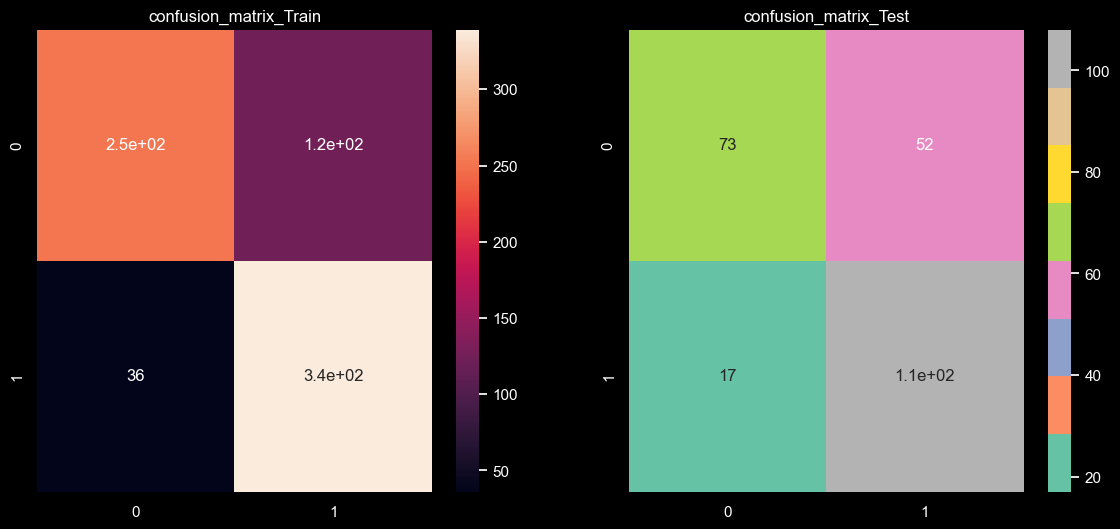

In [99]:
param_grid={'criterion':["gini", "entropy"],
            'splitter' :["best", "random"],
            'max_depth':[2,4,6,7,10],
            'max_features':["auto", "sqrt", "log2"],
            'random_state':[None]
             }
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,refit=True)
grid.fit(x_train,y_train)
DT_grid_pred_train=grid.predict(x_train)
DT_grid_pred_test=grid.predict(x_test)
Train_acc = accuracy_score(y_train, DT_grid_pred_train)
Test_acc = accuracy_score(y_test, DT_grid_pred_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc)
print("Test Accuracy Score :", Test_acc)
print()
print('=='*35)
print( ' '*15,'Classification_report_Train',)
print('=='*35)
print( classification_report(y_train, DT_grid_pred_train))
print('=='*35)
print( ' '*15,'Classification_report_Test',)
print('=='*35)
print(classification_report(y_test, DT_grid_pred_test))
print('=='*35)
cm_train= confusion_matrix(y_train, DT_grid_pred_train)
cm_test = confusion_matrix(y_test, DT_grid_pred_test)
print('===='*10)
print( 'confusion_matrix_Test :','\n','\n',cm_test)
print('===='*10)
print( 'confusion_matrix_Train :','\n','\n',cm_train)
print('===='*10)
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot = True, )
plt.title('confusion_matrix_Train')
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot = True, cmap= 'Set2')
plt.title('confusion_matrix_Test')

In [104]:
dtree_acc=accuracy_score(y_test, DT_grid_pred_test)
dtree_acc_train=accuracy_score(y_train, DT_grid_pred_train)

### 📌Accuracy of train data by decision tree:79%
### 📌Accuracy of test data by decision tree:73%

## 👉- Split data on Balanced data

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.25,random_state=1,stratify=y_smote)

# 🎯BaggingClassifier

In [44]:
bagging=BaggingClassifier()
bagging.fit(x_train,y_train)

BaggingClassifier()

In [45]:
y_pred_bagg_train=bagging.predict(x_train)
y_pred_bagg_test=bagging.predict(x_test)


In [46]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_bagg_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_bagg_test))
print("================================================================================================================")
print('classification_report_train:',classification_report(y_train,y_pred_bagg_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_bagg_test))
print("================================================================================================================")
print('accuracy_score_train:',accuracy_score(y_train,y_pred_bagg_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_bagg_test))


Confusion_matrix_train: [[373   2]
 [  5 370]]

Confusion_matrix_test: [[95 30]
 [29 96]]
classification_report_train:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       375
           1       0.99      0.99      0.99       375

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750


classification_report_test:               precision    recall  f1-score   support

           0       0.77      0.76      0.76       125
           1       0.76      0.77      0.76       125

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250

accuracy_score_train: 0.9906666666666667

accuracy_score_test: 0.764


Trainging Accuracy Score : 0.996
Test Accuracy Score : 0.784

                Classification_report_Train
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       375
           1       1.00      0.99      1.00       375

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

                Classification_report_Test
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       125
           1       0.78      0.78      0.78       125

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250

confusion_matrix_Test : 
 
 [[98 27]
 [27 98]]
confusion_matrix_Train : 
 
 [[374   1]
 [  2 373]]


Text(0.5, 1.0, 'confusion_matrix_Test')

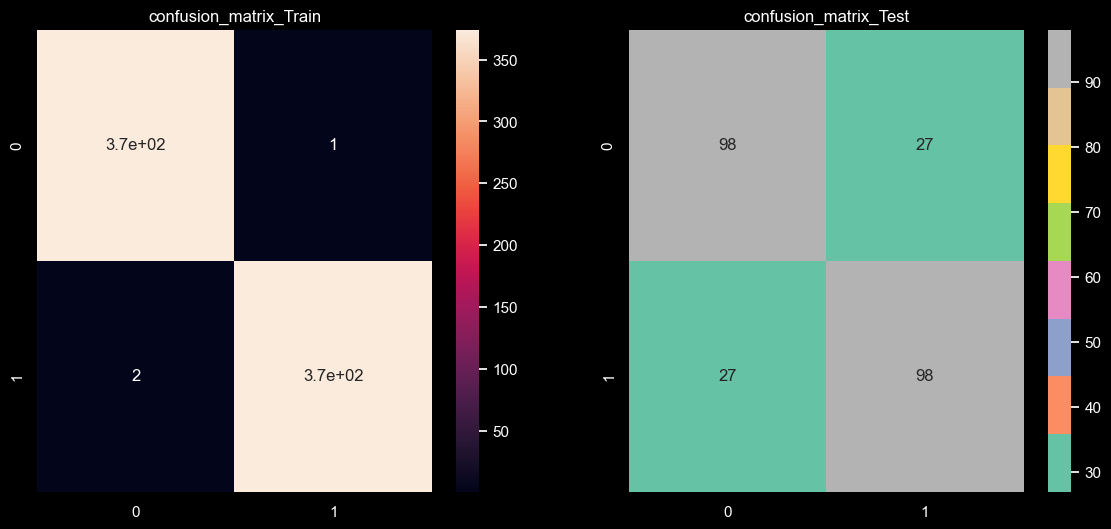

In [101]:
param_grid={'n_estimators':[10,20,30],
            'max_samples':[1.0,5.0,10.0],
            'max_features':[1.0,5.0,10.0],
            'bootstrap':[True,False],
            'oob_score':[True,False]
            }
grid=GridSearchCV(BaggingClassifier(),param_grid,refit=True)
grid.fit(x_train,y_train)
bagg_grid_pred_train=grid.predict(x_train)
bagg_grid_pred_test=grid.predict(x_test)
Train_acc = accuracy_score(y_train, bagg_grid_pred_train)
Test_acc = accuracy_score(y_test, bagg_grid_pred_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc)
print("Test Accuracy Score :", Test_acc)
print()
print('=='*35)
print( ' '*15,'Classification_report_Train',)
print('=='*35)
print( classification_report(y_train, bagg_grid_pred_train))
print('=='*35)
print( ' '*15,'Classification_report_Test',)
print('=='*35)
print(classification_report(y_test, bagg_grid_pred_test))
print('=='*35)
cm_train= confusion_matrix(y_train, bagg_grid_pred_train)
cm_test = confusion_matrix(y_test, bagg_grid_pred_test)
print('===='*10)
print( 'confusion_matrix_Test :','\n','\n',cm_test)
print('===='*10)
print( 'confusion_matrix_Train :','\n','\n',cm_train)
print('===='*10)
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot = True, )
plt.title('confusion_matrix_Train')
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot = True, cmap= 'Set2')
plt.title('confusion_matrix_Test')

### 📌Accuracy of train data by BaggingClassifier:99%
### 📌Accuracy of test data by BaggingClassifier tree:78%

In [103]:
bagg_acc=accuracy_score(y_test,bagg_grid_pred_test)
bagg_acc_train=accuracy_score(y_train,bagg_grid_pred_train)

# 🎯RANDOM FOREST CLASSIFIER:

In [49]:
rf=RandomForestClassifier(criterion='gini')
rf.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
y_pred_rf1_train=rf.predict(x_train)
y_pred_rf1_test=rf.predict(x_test)

In [51]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_rf1_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_rf1_test))
print("================================================================================================================")
print('classification_report_train:',classification_report(y_train,y_pred_rf1_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_rf1_test))
print("================================================================================================================")
print('accuracy_score_train:',accuracy_score(y_train,y_pred_rf1_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_rf1_test))


Confusion_matrix_train: [[375   0]
 [  0 375]]

Confusion_matrix_test: [[ 97  28]
 [ 21 104]]
classification_report_train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       375

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


classification_report_test:               precision    recall  f1-score   support

           0       0.82      0.78      0.80       125
           1       0.79      0.83      0.81       125

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250

accuracy_score_train: 1.0

accuracy_score_test: 0.804


Trainging Accuracy Score : 0.996
Test Accuracy Score : 0.792

                Classification_report_Train
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       375
           1       1.00      0.99      1.00       375

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

                Classification_report_Test
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       125
           1       0.78      0.82      0.80       125

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250

confusion_matrix_Test : 
 
 [[ 96  29]
 [ 23 102]]
confusion_matrix_Train : 
 
 [[374   1]
 [  2 373]]


Text(0.5, 1.0, 'confusion_matrix_Test')

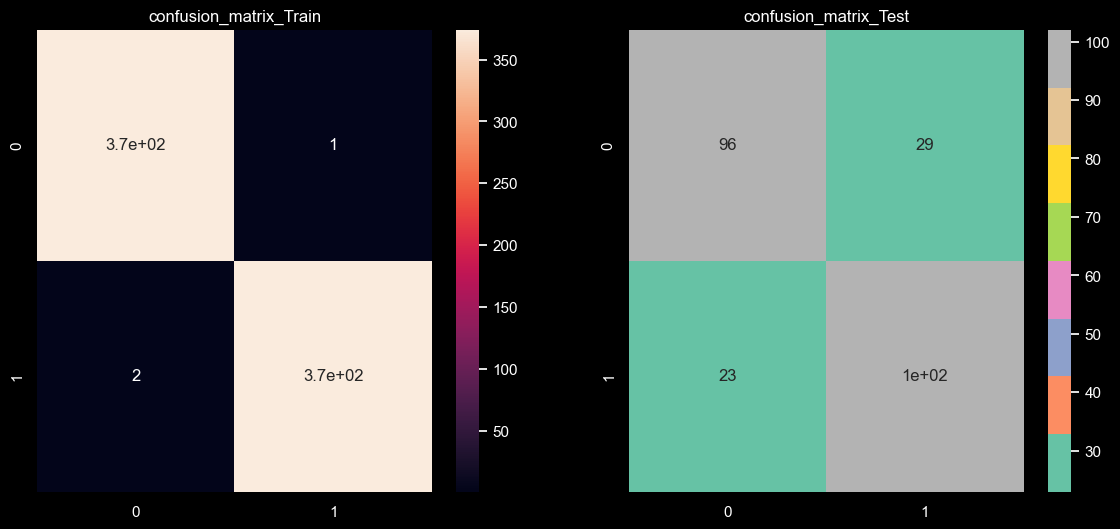

In [52]:
param_grid={'n_estimators':[100,150,200],
            'criterion': ['gini','entropy','log_loss'],
            'max_depth' :[None, 2,4,6],
            'min_samples_split' :[2,4,6,8,10],
            'min_samples_leaf' :[1,2,4],
            'max_features':['sqrt','log2',None],
            'oob_score':[True]
            }
grid=GridSearchCV(RandomForestClassifier(),param_grid,refit=True)
grid.fit(x_train,y_train)
rf_grid_pred_train=grid.predict(x_train)
rf_grid_pred_test=grid.predict(x_test)
Train_acc = accuracy_score(y_train, rf_grid_pred_train)
Test_acc = accuracy_score(y_test, rf_grid_pred_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc)
print("Test Accuracy Score :", Test_acc)
print()
print('=='*35)
print( ' '*15,'Classification_report_Train',)
print('=='*35)
print( classification_report(y_train, rf_grid_pred_train))
print('=='*35)
print( ' '*15,'Classification_report_Test',)
print('=='*35)
print(classification_report(y_test, rf_grid_pred_test))
print('=='*35)
cm_train= confusion_matrix(y_train, rf_grid_pred_train)
cm_test = confusion_matrix(y_test, rf_grid_pred_test)
print('===='*10)
print( 'confusion_matrix_Test :','\n','\n',cm_test)
print('===='*10)
print( 'confusion_matrix_Train :','\n','\n',cm_train)
print('===='*10)
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot = True, )
plt.title('confusion_matrix_Train')
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot = True, cmap= 'Set2')
plt.title('confusion_matrix_Test')

In [105]:
rf_acc=accuracy_score(y_test, rf_grid_pred_test)
rf_acc_train=accuracy_score(y_train, rf_grid_pred_train)

### 📌Accuracy of train data by RANDOMFOREST :92%
### 📌Accuracy of test data by RANDOMFOREST:77%

### 📌Accuracy of train data by RANDOMFOREST after tuning :94%
### 📌Accuracy of test data by RANDOMFOREST after tuning:78%

#  🎯NAIVE BAYE'S THEOREM:

## Guassian Naive Baye's :

In [53]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [54]:
y_pred_gnb_train=gnb.predict(x_train)
y_pred_gnb_test=gnb.predict(x_test)

In [55]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_gnb_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_gnb_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_gnb_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_gnb_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_gnb_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_gnb_test))

Confusion_matrix_train: [[286  89]
 [102 273]]

Confusion_matrix_test: [[93 32]
 [40 85]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

           0       0.74      0.76      0.75       375
           1       0.75      0.73      0.74       375

    accuracy                           0.75       750
   macro avg       0.75      0.75      0.75       750
weighted avg       0.75      0.75      0.75       750


classification_report_test:               precision    recall  f1-score   support

           0       0.70      0.74      0.72       125
           1       0.73      0.68      0.70       125

    accuracy                           0.71       250
   macro avg       0.71      0.71      0.71       250
weighted avg       0.71      0.71      0.71       250

************************************************************
accuracy_score_train: 0.7453333333333333

accuracy_score_test: 0.712


## BERNOULLIS NAIVE BAYE'S:

In [56]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [57]:
y_pred_bnb_train=bnb.predict(x_train)
y_pred_bnb_test=bnb.predict(x_test)

In [58]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_bnb_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_bnb_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_bnb_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_bnb_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_bnb_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_bnb_test))

Confusion_matrix_train: [[ 59 316]
 [ 44 331]]

Confusion_matrix_test: [[ 14 111]
 [ 21 104]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

           0       0.57      0.16      0.25       375
           1       0.51      0.88      0.65       375

    accuracy                           0.52       750
   macro avg       0.54      0.52      0.45       750
weighted avg       0.54      0.52      0.45       750


classification_report_test:               precision    recall  f1-score   support

           0       0.40      0.11      0.18       125
           1       0.48      0.83      0.61       125

    accuracy                           0.47       250
   macro avg       0.44      0.47      0.39       250
weighted avg       0.44      0.47      0.39       250

************************************************************
accuracy_score_train: 0.52

accuracy_score_test: 0.472


In [59]:
print('Accuracy of the Train data by GaussianNB :',accuracy_score(y_train,y_pred_gnb_train))
print('===============================================================================================')
print('Accuracy of the Test data  by GaussianNB:',accuracy_score(y_test,y_pred_gnb_test))
print('===============================================================================================')
print('Accuracy of the Train data by BernoulliNB:',accuracy_score(y_train,y_pred_bnb_train))
print('===============================================================================================')
print('Accuracy of the Test data  by BernoulliNB  :',accuracy_score(y_test,y_pred_bnb_test))

Accuracy of the Train data by GaussianNB : 0.7453333333333333
Accuracy of the Test data  by GaussianNB: 0.712
Accuracy of the Train data by BernoulliNB: 0.52
Accuracy of the Test data  by BernoulliNB  : 0.472


### 📌Accuracy of train data by GaussianNB:75%
### 📌Accuracy of test data by GaussianNB:69%
### 📌Accuracy of train data by BernoullliNB:74%
### 📌Accuracy of test data by  BernoullliNB:68%

In [106]:
gnb_acc=accuracy_score(y_test,y_pred_gnb_test)
gnb_acc_train=accuracy_score(y_train,y_pred_gnb_train)
bnb_acc_train=accuracy_score(y_train,y_pred_bnb_train)
bnb_acc=accuracy_score(y_test,y_pred_bnb_test)

# 🎯K-NEAREST NEIGHBOR:

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
y_test=np.array(y_test)

In [62]:
error_rate=[]
for i in range(1,50):
    knn=KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    y_pred_knn_train=knn.predict(x_train)
    y_pred_knn_test=knn.predict(x_test)
    error_rate.append(np.mean(y_test!=y_pred_knn_test))

error_rate

[0.224,
 0.292,
 0.264,
 0.256,
 0.288,
 0.28,
 0.292,
 0.292,
 0.284,
 0.3,
 0.296,
 0.296,
 0.288,
 0.288,
 0.288,
 0.292,
 0.288,
 0.276,
 0.28,
 0.292,
 0.3,
 0.3,
 0.3,
 0.308,
 0.296,
 0.3,
 0.296,
 0.3,
 0.288,
 0.28,
 0.284,
 0.292,
 0.28,
 0.292,
 0.292,
 0.284,
 0.288,
 0.292,
 0.296,
 0.296,
 0.292,
 0.288,
 0.288,
 0.304,
 0.292,
 0.3,
 0.312,
 0.288,
 0.296]

## 🎯Hyper parameter tuning

Trainging Accuracy Score : 0.7986666666666666
Test Accuracy Score : 0.748

                Classification_report_Train
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       375
           1       0.77      0.86      0.81       375

    accuracy                           0.80       750
   macro avg       0.80      0.80      0.80       750
weighted avg       0.80      0.80      0.80       750

                Classification_report_Test
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       125
           1       0.72      0.82      0.77       125

    accuracy                           0.75       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.75      0.75      0.75       250

confusion_matrix_Test : 
 
 [[ 84  41]
 [ 22 103]]
confusion_matrix_Train : 
 
 [[276  99]
 [ 52 323]]


Text(0.5, 1.0, 'confusion_matrix_Test')

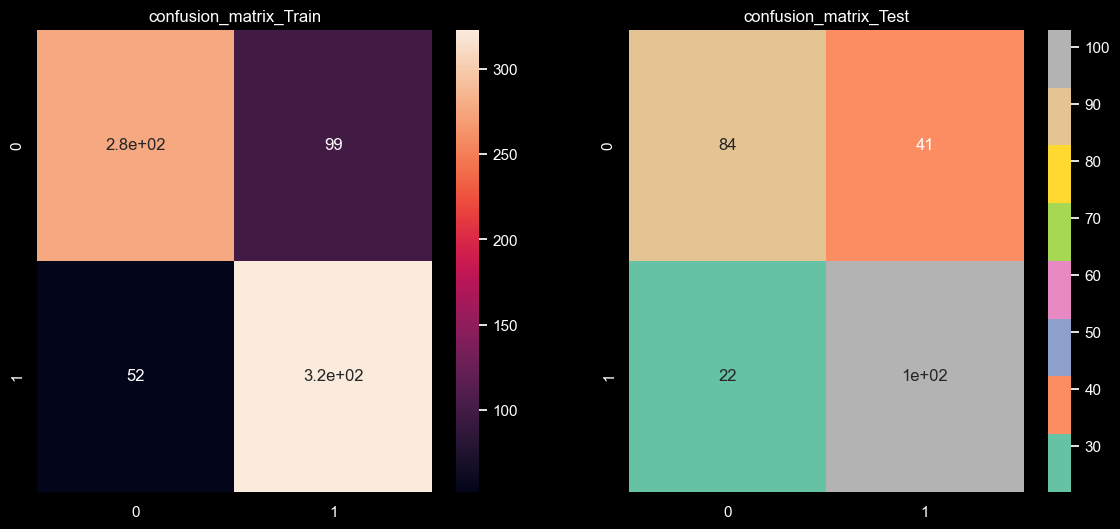

In [63]:
param_grid={'n_neighbors':[10,11,18,28,48],
           'weights':['uniform'],
           'algorithm':['auto'],
          'leaf_size':[30,50],
           'p':[2,1],
          'metric':['minkowski']
           }
grid=GridSearchCV(KNeighborsClassifier(),param_grid,refit=True)
grid.fit(x_train,y_train)
knn_grid_pred_train=grid.predict(x_train)
knn_grid_pred_test=grid.predict(x_test)
Train_acc = accuracy_score(y_train, knn_grid_pred_train)
Test_acc = accuracy_score(y_test, knn_grid_pred_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc)
print("Test Accuracy Score :", Test_acc)
print()
print('=='*35)
print( ' '*15,'Classification_report_Train',)
print('=='*35)
print( classification_report(y_train, knn_grid_pred_train))
print('=='*35)
print( ' '*15,'Classification_report_Test',)
print('=='*35)
print(classification_report(y_test, knn_grid_pred_test))
print('=='*35)
cm_train= confusion_matrix(y_train, knn_grid_pred_train)
cm_test = confusion_matrix(y_test, knn_grid_pred_test)
print('===='*10)
print( 'confusion_matrix_Test :','\n','\n',cm_test)
print('===='*10)
print( 'confusion_matrix_Train :','\n','\n',cm_train)
print('===='*10)
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot = True, )
plt.title('confusion_matrix_Train')
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot = True, cmap= 'Set2')
plt.title('confusion_matrix_Test')

## 📌Accuracy of train data by K-NEAREST NEIGHBOR:78%
## 📌Accuracy of test data by K-NEAREST NEIGHBOR:74%

In [107]:
knn_acc=accuracy_score(y_test, knn_grid_pred_test)
knn_acc_train=accuracy_score(y_train, knn_grid_pred_train)

# 🎯Support Vector Machine (SVM)

In [64]:
from sklearn.svm import SVC

In [108]:
#kernel=linear
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred_svm_train=svm_linear.predict(x_train)
y_pred_svm_test=svm_linear.predict(x_test)

In [109]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_svm_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_svm_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_svm_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_svm_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_svm_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_svm_test))

Confusion_matrix_train: [[284  91]
 [102 273]]

Confusion_matrix_test: [[93 32]
 [45 80]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

           0       0.74      0.76      0.75       375
           1       0.75      0.73      0.74       375

    accuracy                           0.74       750
   macro avg       0.74      0.74      0.74       750
weighted avg       0.74      0.74      0.74       750


classification_report_test:               precision    recall  f1-score   support

           0       0.67      0.74      0.71       125
           1       0.71      0.64      0.68       125

    accuracy                           0.69       250
   macro avg       0.69      0.69      0.69       250
weighted avg       0.69      0.69      0.69       250

************************************************************
accuracy_score_train: 0.7426666666666667

accuracy_score_test: 0.692


In [67]:
#kernel=sigmoidal
svm_sigmoid=SVC(kernel='sigmoid')
svm_sigmoid.fit(x_train,y_train)
y_pred_svm_sigmoid_train=svm_sigmoid.predict(x_train)
y_pred_svm_sigmoid_test=svm_sigmoid.predict(x_test)

In [68]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_svm_sigmoid_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_svm_sigmoid_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_svm_sigmoid_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_svm_sigmoid_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_svm_sigmoid_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_svm_sigmoid_test))

Confusion_matrix_train: [[104 271]
 [270 105]]

Confusion_matrix_test: [[41 84]
 [82 43]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

           0       0.28      0.28      0.28       375
           1       0.28      0.28      0.28       375

    accuracy                           0.28       750
   macro avg       0.28      0.28      0.28       750
weighted avg       0.28      0.28      0.28       750


classification_report_test:               precision    recall  f1-score   support

           0       0.33      0.33      0.33       125
           1       0.34      0.34      0.34       125

    accuracy                           0.34       250
   macro avg       0.34      0.34      0.34       250
weighted avg       0.34      0.34      0.34       250

************************************************************
accuracy_score_train: 0.2786666666666667

accuracy_score_test: 0.336


In [69]:
#kernel=poly
svm_poly=SVC(kernel='poly')
svm_poly.fit(x_train,y_train)
y_pred_svm_poly_train=svm_poly.predict(x_train)
y_pred_svm_poly_test=svm_poly.predict(x_test)

In [70]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_svm_poly_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_svm_poly_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_svm_poly_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_svm_poly_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_svm_poly_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_svm_poly_test))

Confusion_matrix_train: [[311  64]
 [130 245]]

Confusion_matrix_test: [[103  22]
 [ 55  70]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

           0       0.71      0.83      0.76       375
           1       0.79      0.65      0.72       375

    accuracy                           0.74       750
   macro avg       0.75      0.74      0.74       750
weighted avg       0.75      0.74      0.74       750


classification_report_test:               precision    recall  f1-score   support

           0       0.65      0.82      0.73       125
           1       0.76      0.56      0.65       125

    accuracy                           0.69       250
   macro avg       0.71      0.69      0.69       250
weighted avg       0.71      0.69      0.69       250

************************************************************
accuracy_score_train: 0.7413333333333333

accuracy_score_test: 0.692


In [71]:
#rbf(radial basis function)---->by default kernel
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(x_train,y_train)
y_pred_svm_rbf_train=svm_rbf.predict(x_train)
y_pred_svm_rbf_test=svm_rbf.predict(x_test)

In [72]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_svm_rbf_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_svm_rbf_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_svm_rbf_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_svm_rbf_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_svm_rbf_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_svm_rbf_test))

Confusion_matrix_train: [[280  95]
 [ 90 285]]

Confusion_matrix_test: [[89 36]
 [40 85]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

           0       0.76      0.75      0.75       375
           1       0.75      0.76      0.75       375

    accuracy                           0.75       750
   macro avg       0.75      0.75      0.75       750
weighted avg       0.75      0.75      0.75       750


classification_report_test:               precision    recall  f1-score   support

           0       0.69      0.71      0.70       125
           1       0.70      0.68      0.69       125

    accuracy                           0.70       250
   macro avg       0.70      0.70      0.70       250
weighted avg       0.70      0.70      0.70       250

************************************************************
accuracy_score_train: 0.7533333333333333

accuracy_score_test: 0.696


### 📌Accuracy of train data by SUPPORT VECTOR MACHINE[rbf]:75%
### 📌Accuracy of test data by SUPPORT VECTOR MACHINE[rbf]:69%

In [110]:
svm_acc_rbf=accuracy_score(y_test,y_pred_svm_rbf_test)
svm_acc_rbf_train=accuracy_score(y_train,y_pred_svm_rbf_train)

# 🎯BOOSTING :

In [73]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [74]:
!pip install Xgboost

In [75]:
adaboost=AdaBoostClassifier()
adb=adaboost.fit(x_train,y_train)
y_pred_adb_train=adb.predict(x_train)
y_pred_adb_test=adb.predict(x_test)
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_adb_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_adb_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_adb_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_adb_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_adb_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_adb_test))

Confusion_matrix_train: [[315  60]
 [ 51 324]]

Confusion_matrix_test: [[ 97  28]
 [ 22 103]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

           0       0.86      0.84      0.85       375
           1       0.84      0.86      0.85       375

    accuracy                           0.85       750
   macro avg       0.85      0.85      0.85       750
weighted avg       0.85      0.85      0.85       750


classification_report_test:               precision    recall  f1-score   support

           0       0.82      0.78      0.80       125
           1       0.79      0.82      0.80       125

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250

************************************************************
accuracy_score_train: 0.852

accuracy_score_test: 0.8


In [76]:
gdboost=GradientBoostingClassifier()
gdb=gdboost.fit(x_train,y_train)
y_pred_gdb_train=gdb.predict(x_train)
y_pred_gdb_test=gdb.predict(x_test)
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_gdb_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_gdb_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_gdb_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_gdb_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_gdb_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_gdb_test))

Confusion_matrix_train: [[341  34]
 [ 22 353]]

Confusion_matrix_test: [[ 94  31]
 [ 22 103]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

           0       0.94      0.91      0.92       375
           1       0.91      0.94      0.93       375

    accuracy                           0.93       750
   macro avg       0.93      0.93      0.93       750
weighted avg       0.93      0.93      0.93       750


classification_report_test:               precision    recall  f1-score   support

           0       0.81      0.75      0.78       125
           1       0.77      0.82      0.80       125

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250

************************************************************
accuracy_score_train: 0.9253333333333333

accuracy_score_test: 0.788


In [77]:
from xgboost import XGBClassifier

In [78]:
xgboost=XGBClassifier()
xgb=xgboost.fit(x_train,y_train)
y_pred_xgb_train=xgb.predict(x_train)
y_pred_xgb_test=xgb.predict(x_test)
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_xgb_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_xgb_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_xgb_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_xgb_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_xgb_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_xgb_test))

Confusion_matrix_train: [[375   0]
 [  0 375]]

Confusion_matrix_test: [[ 94  31]
 [ 21 104]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       375

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


classification_report_test:               precision    recall  f1-score   support

           0       0.82      0.75      0.78       125
           1       0.77      0.83      0.80       125

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250

************************************************************
accuracy_score_train: 1.0

accuracy_score_test: 0.792


In [79]:
from sklearn.model_selection import cross_val_score
train_accuracy=cross_val_score(xgboost,x_train,y_train,cv=10)
print('Train accuracy:',train_accuracy.mean())
print('Test accuracy:',accuracy_score(y_test,y_pred_xgb_test))

Train accuracy: 0.8039999999999999
Test accuracy: 0.792


In [80]:
from sklearn.model_selection import cross_val_score
train_accuracy=cross_val_score(gdboost,x_train,y_train,cv=10)
print('Train accuracy:',train_accuracy.mean())
print('Test accuracy:',accuracy_score(y_test,y_pred_gdb_test))

Train accuracy: 0.792
Test accuracy: 0.788


### 📌Accuracy of train data by BOOSTING:85%
### 📌Accuracy of test data by BOOSTIG:80%

In [111]:
adb_acc=accuracy_score(y_test,y_pred_adb_test)
adb_acc_train=accuracy_score(y_train,y_pred_adb_train)
gdb_acc=accuracy_score(y_test,y_pred_gdb_test)
gdb_acc_train=accuracy_score(y_train,y_pred_gdb_train)
xgb_acc=accuracy_score(y_test,y_pred_xgb_test)
xgb_acc_train=accuracy_score(y_train,y_pred_xgb_train)

# 🎯VOTING ENSEMBLE METHOD

In [115]:
##only best models to be considered
from sklearn.ensemble import VotingClassifier
evc=VotingClassifier(estimators=[('logit',logit),('decisiontree',dtree),('adb',adb),('gnb',gnb),('knn',knn)])
evc.fit(x_train,y_train)
y_pred_evc_train=evc.predict(x_train)
y_pred_evc_test=evc.predict(x_test)
print('TRAIN ACCURACY EVC MODEL :',accuracy_score(y_train,y_pred_evc_train))
print('TEST ACCURACY EVC MODEL :',accuracy_score(y_test,y_pred_evc_test))

TRAIN ACCURACY EVC MODEL : 0.8386666666666667
TEST ACCURACY EVC MODEL : 0.764


### 📌Accuracy of train data by BOOSTING:83%
### 📌Accuracy of test data by BOOSTIG:76%

# 🎯SUMMARY

In [116]:
model=['logistic','decisiontree','bagging','randomforest','GaussianNB','BernoulliNB','KNN','SVM','AdaBoost','Gradient Boost','XGBOOST']
Test_Accuracy=[logit_acc,dtree_acc,bagg_acc,rf_acc,gnb_acc,bnb_acc,knn_acc,svm_acc_rbf,adb_acc,gdb_acc,xgb_acc]
Train_Accuracy=[logit_acc_train,dtree_acc_train,bagg_acc_train,rf_acc_train,gnb_acc_train,bnb_acc_train,knn_acc_train,svm_acc_rbf_train,adb_acc_train,gdb_acc_train,xgb_acc_train]

In [117]:
metrics_df=pd.DataFrame({'model_name':model,'Train_Accuracy':Train_Accuracy,'Test_Accuracy':Test_Accuracy})

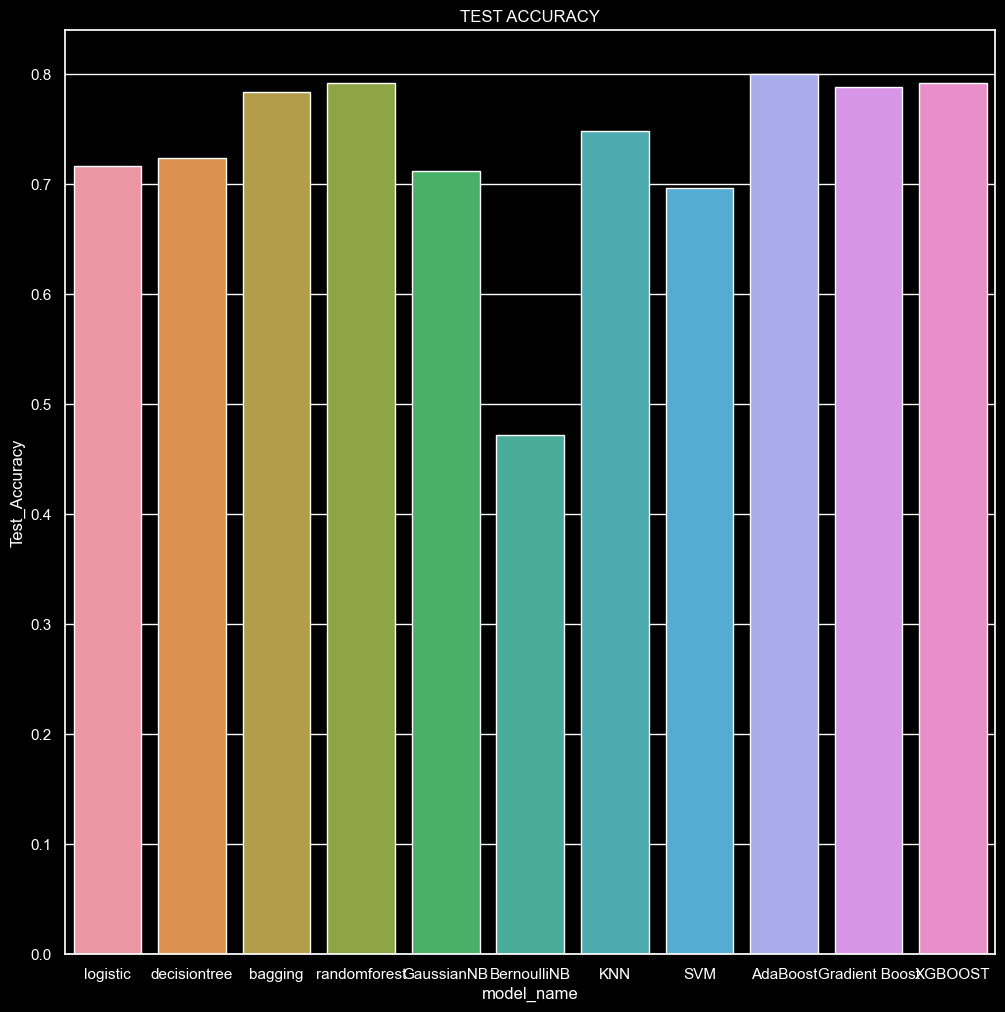

In [119]:
plt.figure(figsize=(12,12))
sns.barplot(x='model_name',y='Test_Accuracy',data=metrics_df)
plt.title('TEST ACCURACY')
plt.show()

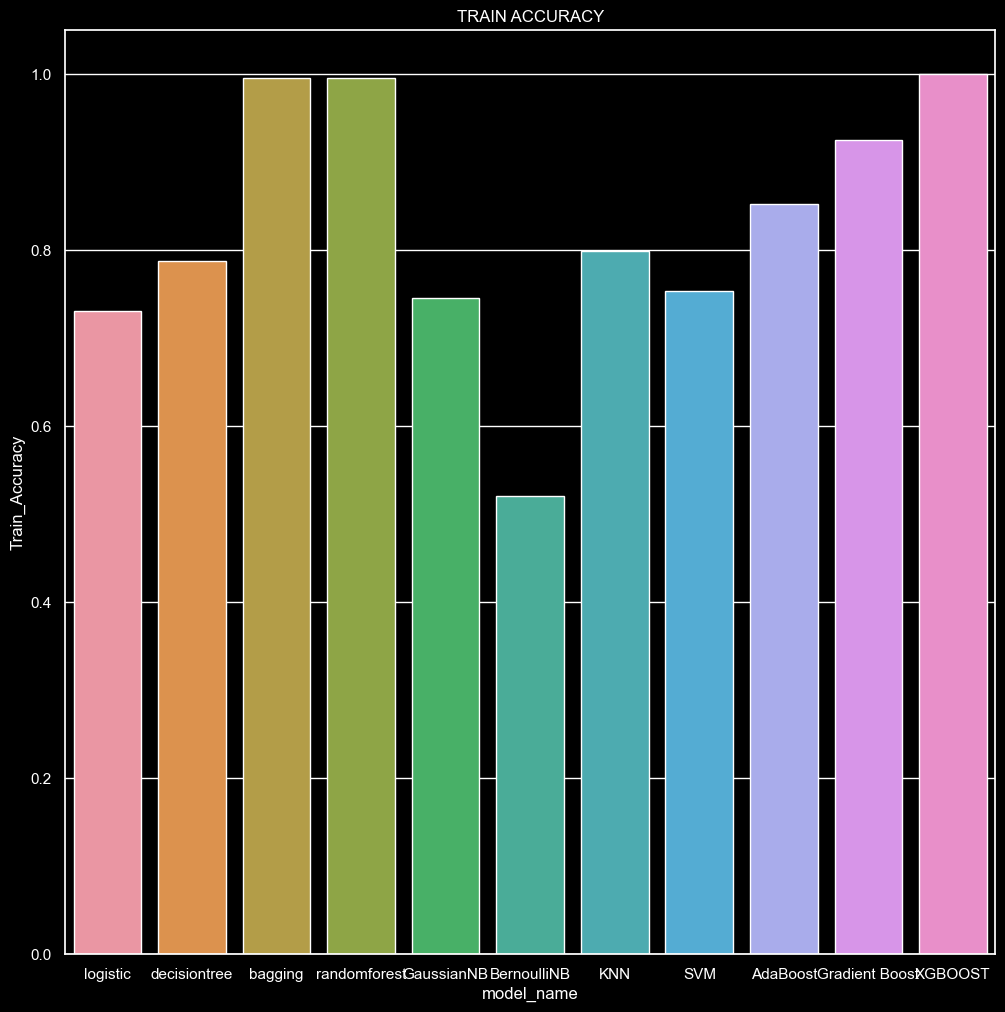

In [120]:
plt.figure(figsize=(12,12))
sns.barplot(x='model_name',y='Train_Accuracy',data=metrics_df)
plt.title('TRAIN ACCURACY')
plt.show()

In [121]:
metrics_df

,model_name,Train_Accuracy,Test_Accuracy
0,logistic,0.730667,0.716
1,decisiontree,0.788000,0.724
2,bagging,0.996000,0.784
3,randomforest,0.996000,0.792
4,GaussianNB,0.745333,0.712
5,BernoulliNB,0.520000,0.472
6,KNN,0.798667,0.748
7,SVM,0.753333,0.696
8,AdaBoost,0.852000,0.800
9,Gradient Boost,0.925333,0.788


### We can observe that Decision Tree,KNN,ADA Boost are delivering good test accuracies and train accuracies

In [123]:
dt_var=abs(dtree_acc-dtree_acc_train)
knn_var=abs(knn_acc-knn_acc_train)
adb_var=abs(adb_acc-adb_acc_train)

In [124]:
print('DECISION TREE')
print('===========================================================')
print('TRAIN ACCURACY:',dtree_acc_train)
print('TEST ACCURACY:',dtree_acc)
print('VARIENCE:',dt_var)
print('===========================================================')
print('K NEAREST NEIGHBOR')
print('===========================================================')
print('TRAIN ACCURACY:',knn_acc_train)
print('TEST ACCURACY:',knn_acc)
print('VARIENCE:',knn_var)
print('===========================================================')
print('ADA BOOST')
print('===========================================================')
print('TRAIN ACCURACY:',adb_acc_train)
print('TEST ACCURACY:',adb_acc)
print('VARIENCE:',adb_var)

DECISION TREE
TRAIN ACCURACY: 0.788
TEST ACCURACY: 0.724
VARIENCE: 0.06400000000000006
K NEAREST NEIGHBOR
TRAIN ACCURACY: 0.7986666666666666
TEST ACCURACY: 0.748
VARIENCE: 0.05066666666666664
ADA BOOST
TRAIN ACCURACY: 0.852
TEST ACCURACY: 0.8
VARIENCE: 0.051999999999999935


#### When we compare all the best 3 models with their test and test accuracies and varience,the 'ADA BOOST' is delivering better Train and Test Accuracy and little Varience

In [125]:
print('ADA BOOST')
print('===========================================================')
print('TRAIN ACCURACY:',adb_acc_train)
print('TEST ACCURACY:',adb_acc)
print('VARIENCE:',adb_var)

ADA BOOST
TRAIN ACCURACY: 0.852
TEST ACCURACY: 0.8
VARIENCE: 0.051999999999999935


### BEST MODEL:ADA BOOST